<center><h1> 💳Money!💵 </h1></center>

<center><h3> Lowering credit scores is very easy, but raising credit scores is very difficult. So you should always pay attention to your credit score so that it doesn't fall. We buy daily necessities, buy houses, eat food, date and invest. You should know how to manage your credit score wisely. What will affect your credit score? Who can borrow money from a bank and use a credit card? Let's find out! </h3></center>

<center><h5> added some EDA </h5></center>

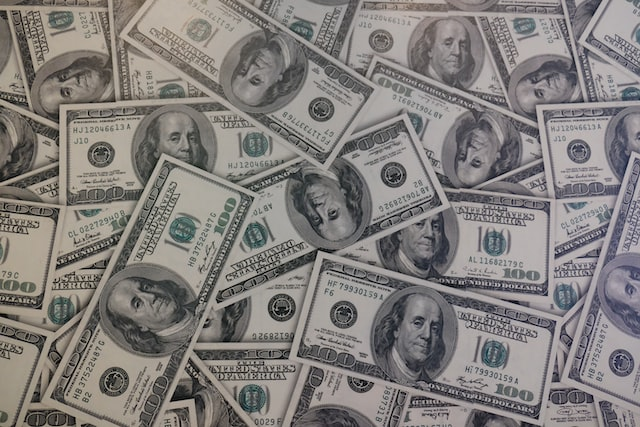

# Money💵: Data Introduction
- **ID**:
Represents a unique identification of an entry

- **Customer_ID**:
Represents a unique identification of a person

- **Month**:
Represents the month of the year

- **Name**:
Represents the name of a person

- **Age**:
Represents the age of the person

- **SSN**:
Represents the social security number of a person

- **Occupation**:
Represents the occupation of the person

- **Annual_Income**:
Represents the annual income of the person

- **Monthly_Inhand_Salary**:
Represents the monthly base salary of a person

- **Num_Bank_Accounts**:
Represents the number of bank accounts a person holds

- **Num_Credit_Card**:
Represents the number of other credit cards held by a person

- **Interest_Rate**:
Represents the interest rate on credit card

- **Num_of_Loan**:
Represents the number of loans taken from the bank

- **Type_of_Loan**:
Represents the types of loan taken by a person

- **Delay_from_due_date**:
Represents the average number of days delayed from the payment date

- **Num_of_Delayed_Payment**:
Represents the average number of payments delayed by a person

- **Changed_Credit_Limit**:
Represents the percentage change in credit card limit

- **Num_Credit_Inquiries**:
Represents the number of credit card inquiries

- **Credit_Mix**:
Represents the classification of the mix of credits

- **Outstanding_Debt**:
Represents the remaining debt to be paid (in USD)

- **Credit_Utilization_Ratio**:
Represents the utilization ratio of credit card

- **Credit_History_Age**:
Represents the age of credit history of the person

- **Payment_of_Min_Amount**:
Represents whether only the minimum amount was paid by the person

- **Total_EMI_per_month**:
Represents the monthly EMI payments (in USD)

- **Amount_invested_monthly**:
Represents the monthly amount invested by the customer (in USD)

- **Payment_Behaviour**:
Represents the payment behavior of the customer (in USD)

- **Monthly_Balance**:
Represents the monthly balance amount of the customer (in USD)

- **Credit_Score**:
Represents the bracket of credit score (Poor, Standard, Good)

# Table of Contents💵
- [1. Import Libraries](#import)
- [2. Data Check💾](#data)
- [3. Very detailed EDA with visualization📊](#eda)
- [4.Modeling(LightGBM)🤖](#modeling)
- [5. What is important for my 💳credit score?🤔](#what)
- [6. Prediction](#prediction)
- [7. 💳Can I borrow money from the banks?💵](#can)
    * Credit Score count
    * by Age Range
    * by Number of Credit Card
    * by Occupations
    * by Payment Behavior
    * by Payment of Min Amount
    * by Outstanding Debt
    * by EMI pre Month
- [8. Money💵: Summary✍️](#conclusion)
    

<a id="import"></a>
# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id="data"></a>
# 2. Data Check💾

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,118462,18271,5,Tomz,20.0,782047216.0,Journalist,101399.130,8535.927500,1.0,...,Good,1061.06,42.681159,297.0,No,132.674897,100.938342,High_spent_Medium_value_payments,856.618467,Standard
1,79065,35045,4,Poornima Guptav,25.0,680320710.0,Accountant,112882.680,9684.890000,5.0,...,Good,722.90,40.090839,347.0,No,353.616124,74.422921,High_spent_Large_value_payments,688.426466,Good
2,73080,46492,7,Robertad,49.0,878433267.0,Scientist,28101.460,2173.463807,5.0,...,Standard,454.67,23.607892,321.0,No,268.268012,85.634011,Low_spent_Small_value_payments,242.921080,Good
3,25986,9539,1,Robertai,34.0,272872927.0,Manager,22438.270,1856.855833,7.0,...,Standard,167.57,27.094189,346.0,No,58.436308,46.038344,Low_spent_Large_value_payments,292.083631,Standard
4,144721,8412,8,Pascaleb,28.0,285719431.0,Media_Manager,20975.400,1943.950000,2.0,...,Good,731.40,26.205042,291.0,NM,16.196792,46.684791,High_spent_Medium_value_payments,361.040007,Good
5,82655,15610,6,Schnurra,36.0,345029110.0,Media_Manager,31751.830,2574.985833,5.0,...,Standard,110.73,24.301922,289.0,Yes,58.006937,56.892143,High_spent_Small_value_payments,369.093763,Standard
6,136101,13305,4,Natsukog,46.0,397146010.0,Musician,8052.790,961.065833,8.0,...,Bad,3937.86,39.178605,78.0,Yes,29.240525,25.207292,Low_spent_Small_value_payments,320.538571,Standard
7,11340,50377,7,Melj,30.0,147544253.0,Entrepreneur,16568.425,1550.702083,5.0,...,Standard,478.11,40.913914,352.0,No,8.474086,23.761873,High_spent_Medium_value_payments,372.834250,Standard
8,143364,28807,7,ty,48.0,680769610.0,Writer,32228.670,2819.603375,7.0,...,Standard,940.36,28.589412,392.0,NM,176.204872,64.342749,High_spent_Small_value_payments,327.861512,Good
9,14640,10257,7,Paul Lienertz,35.0,470388761.0,Architect,19328.710,1480.725833,3.0,...,Good,160.03,25.221563,206.0,No,25.874830,56.741548,Low_spent_Small_value_payments,336.098597,Standard


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  int64  
 1   Customer_ID               80000 non-null  int64  
 2   Month                     80000 non-null  int64  
 3   Name                      80000 non-null  object 
 4   Age                       80000 non-null  float64
 5   SSN                       80000 non-null  float64
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  float64
 8   Monthly_Inhand_Salary     80000 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  float64
 10  Num_Credit_Card           80000 non-null  float64
 11  Interest_Rate             80000 non-null  float64
 12  Num_of_Loan               80000 non-null  float64
 13  Type_of_Loan              80000 non-null  object 
 14  Delay_

In [5]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,80665.138038,26000.959263,4.503238,33.334475,5.000240e+08,50596.760599,4204.220665,5.363912,5.530325,14.503787,...,21.048825,13.301975,10.457599,5.788588,1423.010186,32.286483,221.332225,107.763316,55.109561,392.775352
std,43304.470941,14338.427720,2.291000,10.763095,2.907191e+08,38281.612222,3184.820122,2.593393,2.067785,8.746723,...,14.788301,6.233707,6.601086,3.865107,1154.528638,5.114983,99.596822,132.304860,38.969263,201.560198
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43174.750000,13727.250000,3.000000,24.000000,2.453159e+08,19417.828750,1630.701667,3.000000,4.000000,7.000000,...,10.000000,9.000000,5.380000,3.000000,565.040000,28.053517,145.000000,29.294017,28.021372,267.618679
50%,80700.000000,25830.000000,5.000000,33.000000,4.995289e+08,37182.620000,3105.010000,5.000000,5.000000,13.000000,...,18.000000,14.000000,9.390000,5.000000,1161.100000,32.303960,219.000000,66.490890,45.255232,334.041067
75%,118187.250000,38422.000000,7.000000,42.000000,7.551803e+08,71749.060000,5971.069167,7.000000,7.000000,20.000000,...,28.000000,18.000000,14.790000,8.000000,1938.110000,36.500044,302.000000,147.593031,71.238483,463.319521
max,155628.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.000000,...,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Let's check the object columns.

In [6]:
object_cols = ["Name", "Occupation", "Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]

for i in object_cols:
    print("column name : {}".format(i))
    print("Number of unique columns of ", i, ":{}".format(data[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(data[i].value_counts()))
    print("------------------------------------------------------------------------")

column name : Name
Number of unique columns of  Name :10128
Values of unique columns of  Name is below: 
Name
Stevex                43
Jessicad              40
Huwk                  37
Raymondr              36
Langep                36
                      ..
Browningo              2
Skariachanr            2
Leungv                 2
Philipp Halstrickv     2
Bhattacharjeet         1
Name: count, Length: 10128, dtype: int64
------------------------------------------------------------------------
column name : Occupation
Number of unique columns of  Occupation :15
Values of unique columns of  Occupation is below: 
Occupation
Lawyer           5731
Architect        5488
Engineer         5451
Media_Manager    5385
Accountant       5385
Scientist        5381
Mechanic         5377
Developer        5351
Journalist       5328
Entrepreneur     5317
Teacher          5294
Doctor           5238
Manager          5153
Musician         5086
Writer           5035
Name: count, dtype: int64
--------------

## Object Columns
- **Name**
    * Number of unique columns of  Name :10128
    * It's too many to handle. And it's not necessary to predict credit score.
- **Occupation**
    * Number of unique columns of  Occupation :15
    * Values of unique columns of  Occupation are: Lawyer, Engineer, Architect, Mechanic, Scientist, Accountant, Developer, Media_Manager, Teacher, Entrepreneur, Doctor, Journalist, Manager, Musician, Writer
- **Type_of_Loan**
    * Number of unique columns of  Type_of_Loan :6261
    * It's too many to handle. If someone wants to use this value, split it by "," then can use it.
- **Credit_Mix**
    * Number of unique columns of  Credit_Mix :3
    * Good, Standard, Poor
- **Payment_of_Min_Amount**
    * Number of unique columns of  Payment_of_Min_Amount :3
    * Yes, No, NM
- **Payment_Behaviour**
    * Number of unique columns of  Payment_Behaviour :6
    * Values of unique columns of  Payment_Behaviour are: 
        - Low_spent_Small_value_payments      
        - High_spent_Medium_value_payments    
        - High_spent_Large_value_payments     
        - Low_spent_Medium_value_payments     
        - High_spent_Small_value_payments     
        - Low_spent_Large_value_payments      
- **Credit_Score(Target)**
    * Number of unique columns of  Credit_Score :3
    * Good, Standard, Poor

In [7]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### There are no null values.

<a id="eda"></a>
# 3. Very detailed EDA with visualization📊

### To calculate mean of Credit Score replace poor, standard, good to 1, 2, 3

In [8]:
l_dict = {"Poor":"1", "Standard":"2", "Good":"3"}

for key, value in l_dict.items():
    data["Credit_Score"] = data["Credit_Score"].str.replace(key, value)

In [9]:
data["Credit_Score"] = data["Credit_Score"].astype("int")

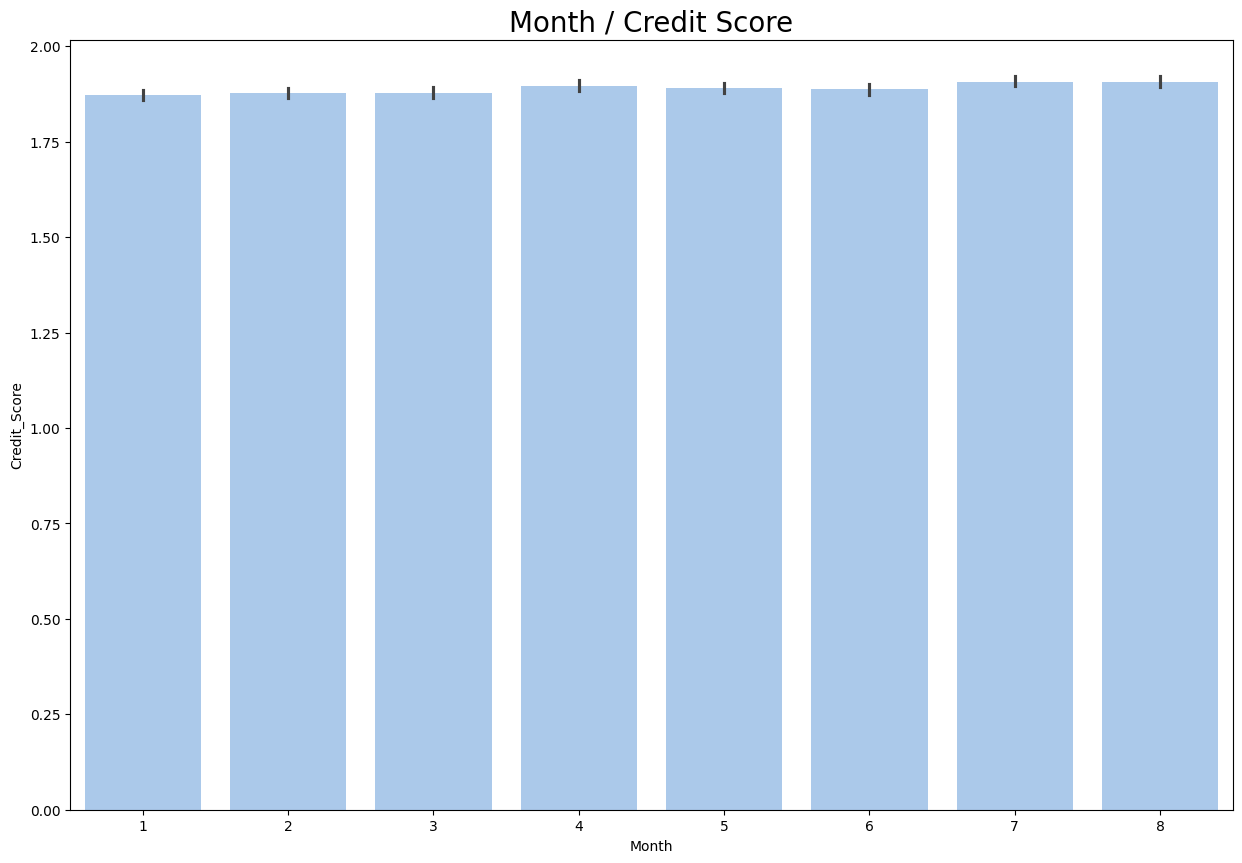

In [10]:
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
plt.title("Month / Credit Score", fontsize=20)
sns.barplot(x="Month", y="Credit_Score", data=data)
plt.show()

## What we can know
    1. There is no big differnece when comparing Month values.

### Make Age Range 10, 20, 30, 40, 50 and check out what happen.

In [11]:
age_range = [i // 10 for i in data["Age"]]

In [12]:
data["Age_Range"] = age_range

In [13]:
data["Age_Range"].value_counts()

Age_Range
3.0    23225
2.0    23039
4.0    18000
1.0     8904
5.0     6832
Name: count, dtype: int64

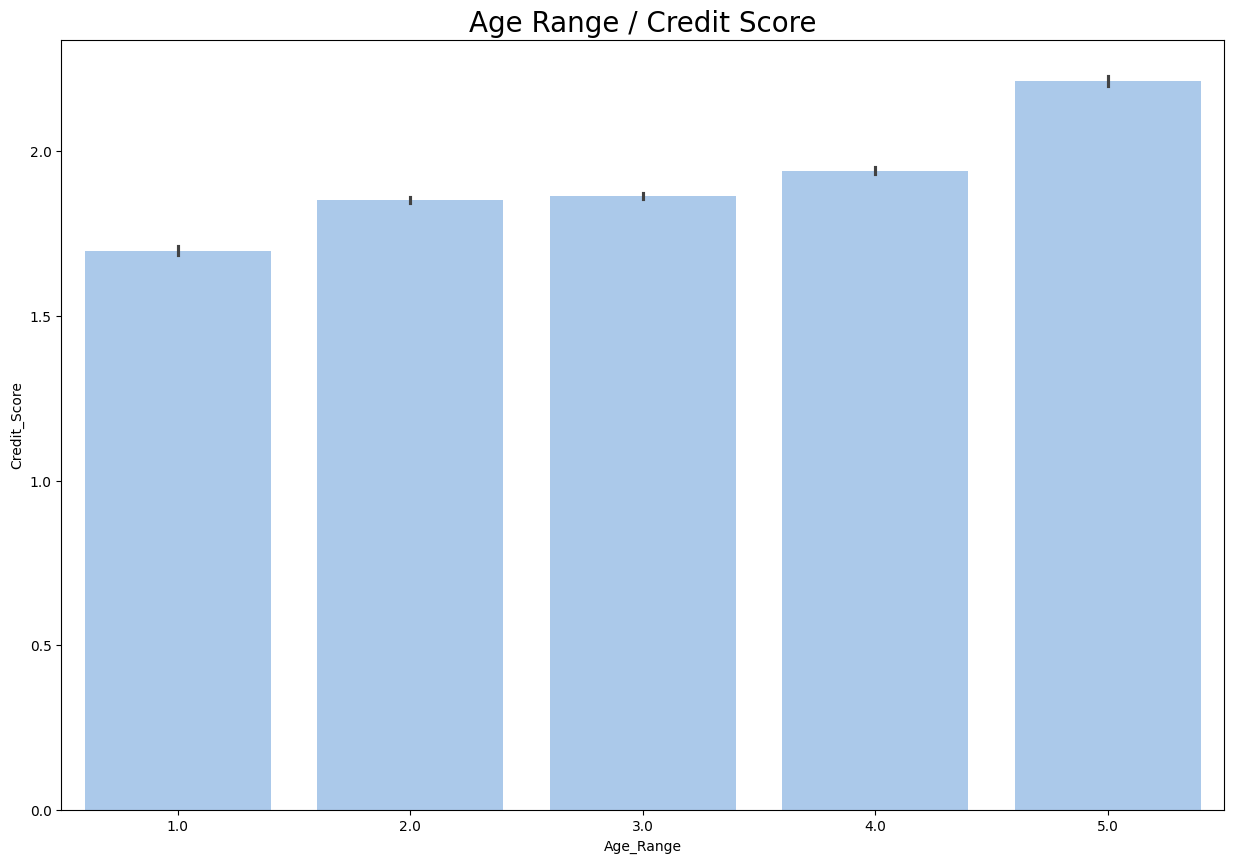

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x="Age_Range", y="Credit_Score", data=data)
plt.title("Age Range / Credit Score", fontsize=20)
plt.show()

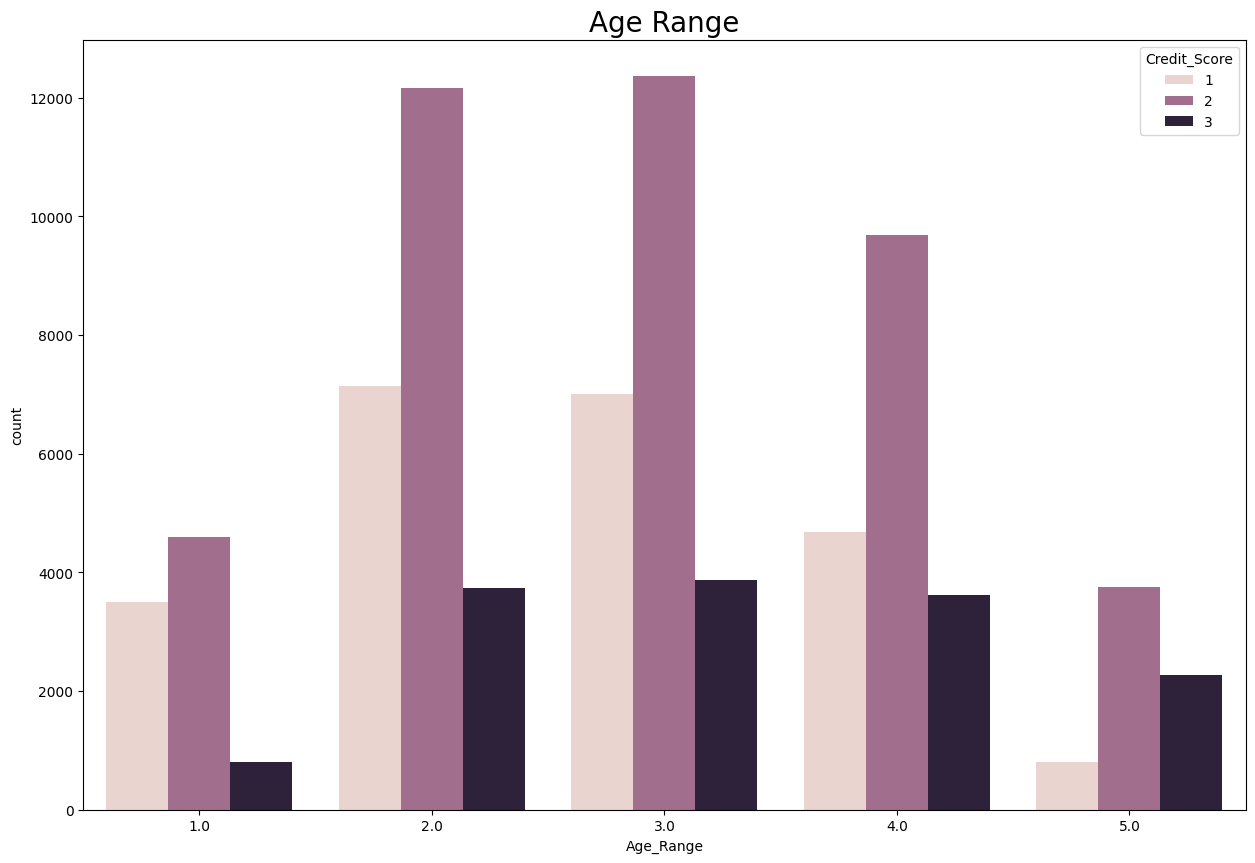

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x="Age_Range", hue="Credit_Score", data=data)
plt.title("Age Range", fontsize=20)
plt.show()

## What we can know(above 2 graphs):
    1. The order according to the number of people is 20s, 30s, 40s, 10s, and 50s.
    2. The order according to the Credit Score is 50s, 40s, 30s, 20s, 10s.
    3. Credit score of most of people is Standard.
    4. There is no big difference between the number of people who got Good credit score in 20s, 30s, 40s.

In [16]:
data["Occupation"].value_counts()

Occupation
Lawyer           5731
Architect        5488
Engineer         5451
Media_Manager    5385
Accountant       5385
Scientist        5381
Mechanic         5377
Developer        5351
Journalist       5328
Entrepreneur     5317
Teacher          5294
Doctor           5238
Manager          5153
Musician         5086
Writer           5035
Name: count, dtype: int64

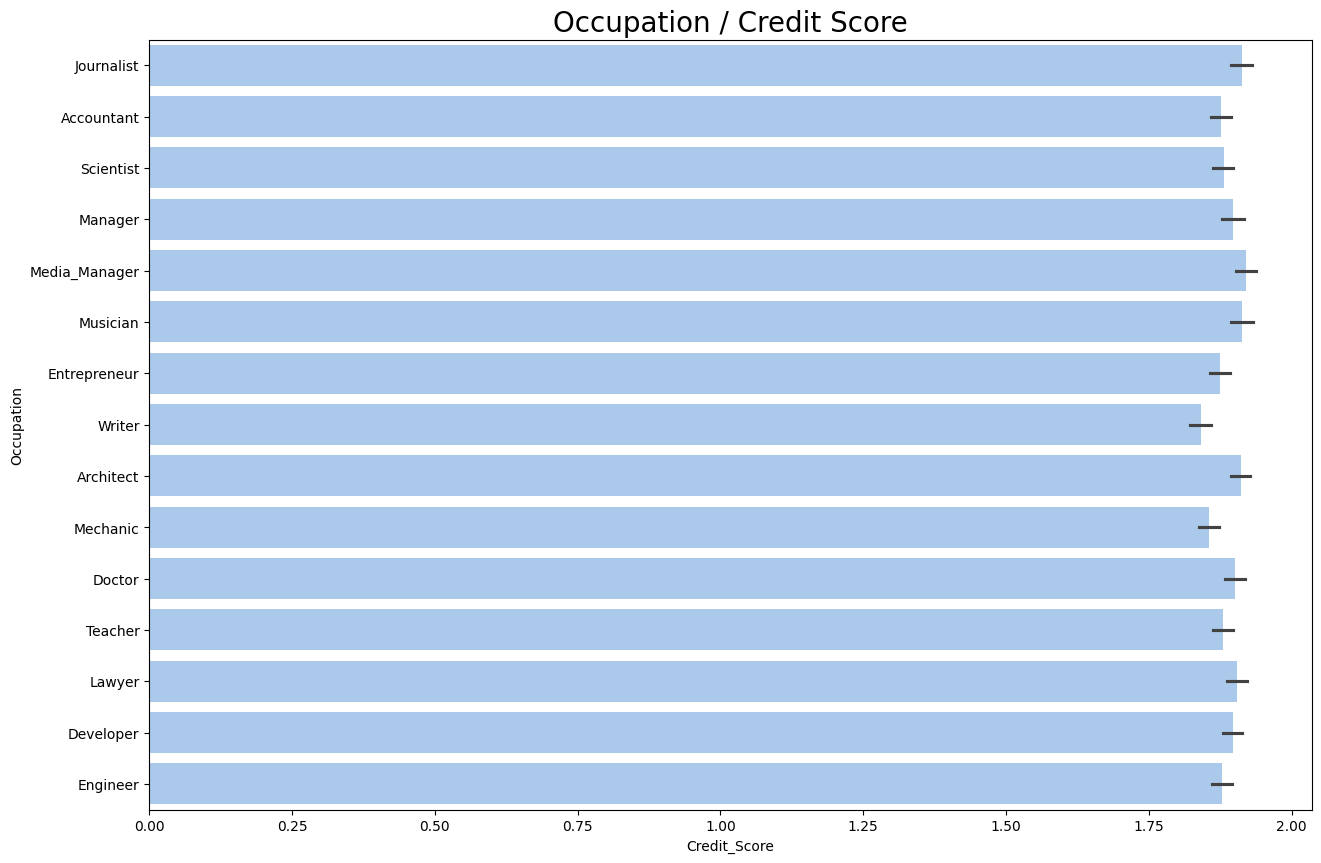

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x="Credit_Score", y="Occupation", data=data)
plt.title("Occupation / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. There are no big difference between occpupations.

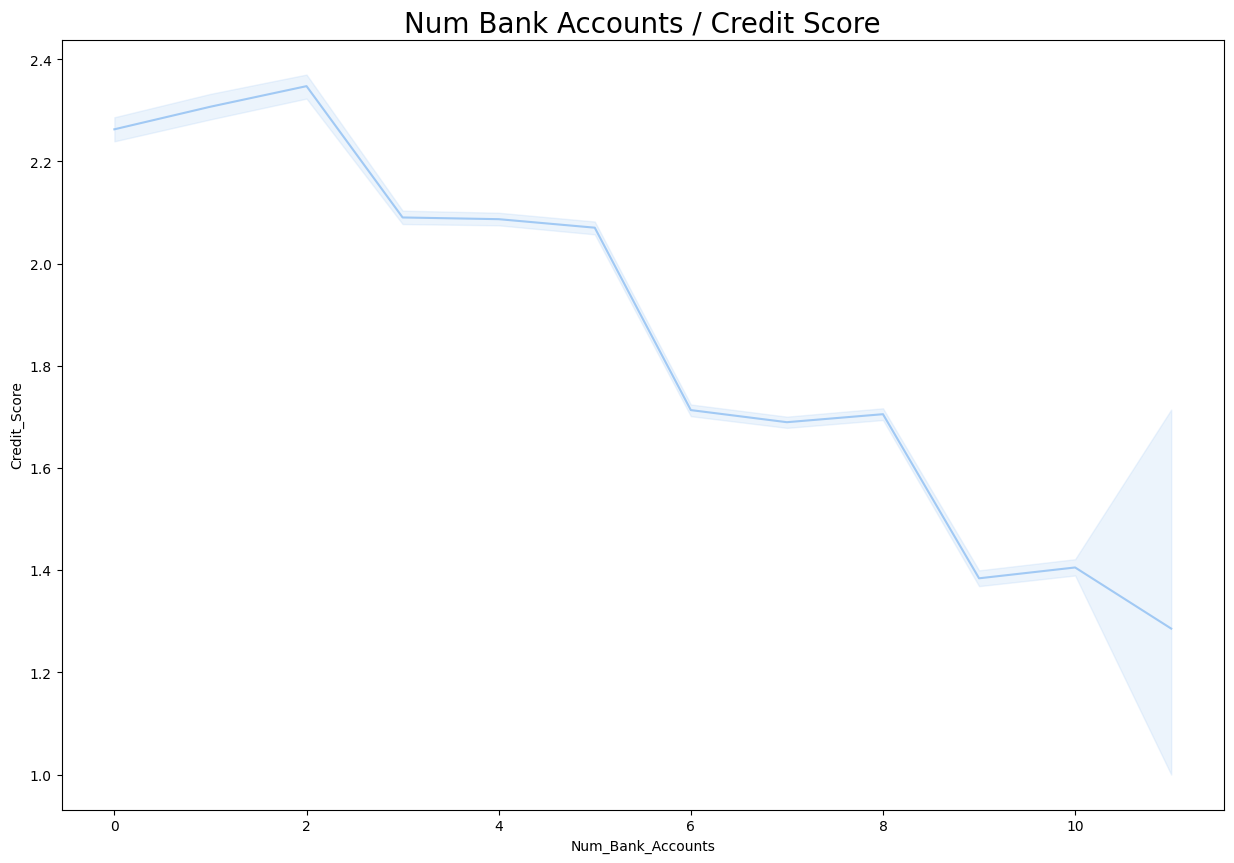

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Num_Bank_Accounts", y="Credit_Score", data=data)
plt.title("Num Bank Accounts / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. As the number of bank accounts increases, the credit score decreases.
    2. The shape of the falling graph is closer to the shape of the staircase than to the straight line.

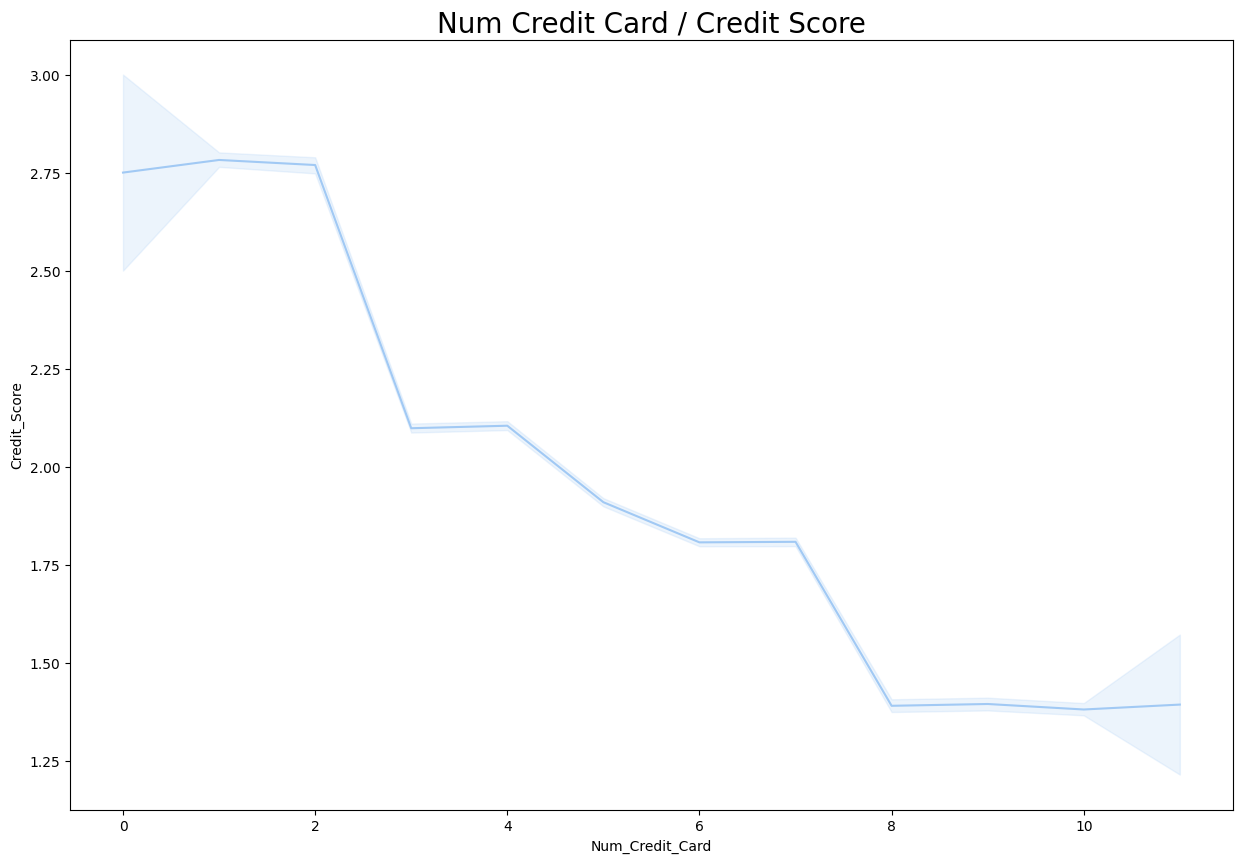

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Num_Credit_Card", y="Credit_Score", data=data)
plt.title("Num Credit Card / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. As the number of credit cards increases, the credit score decreases.
    2. When the number of credit cards is 2-3 or 7-8, the credit score drops significantly.

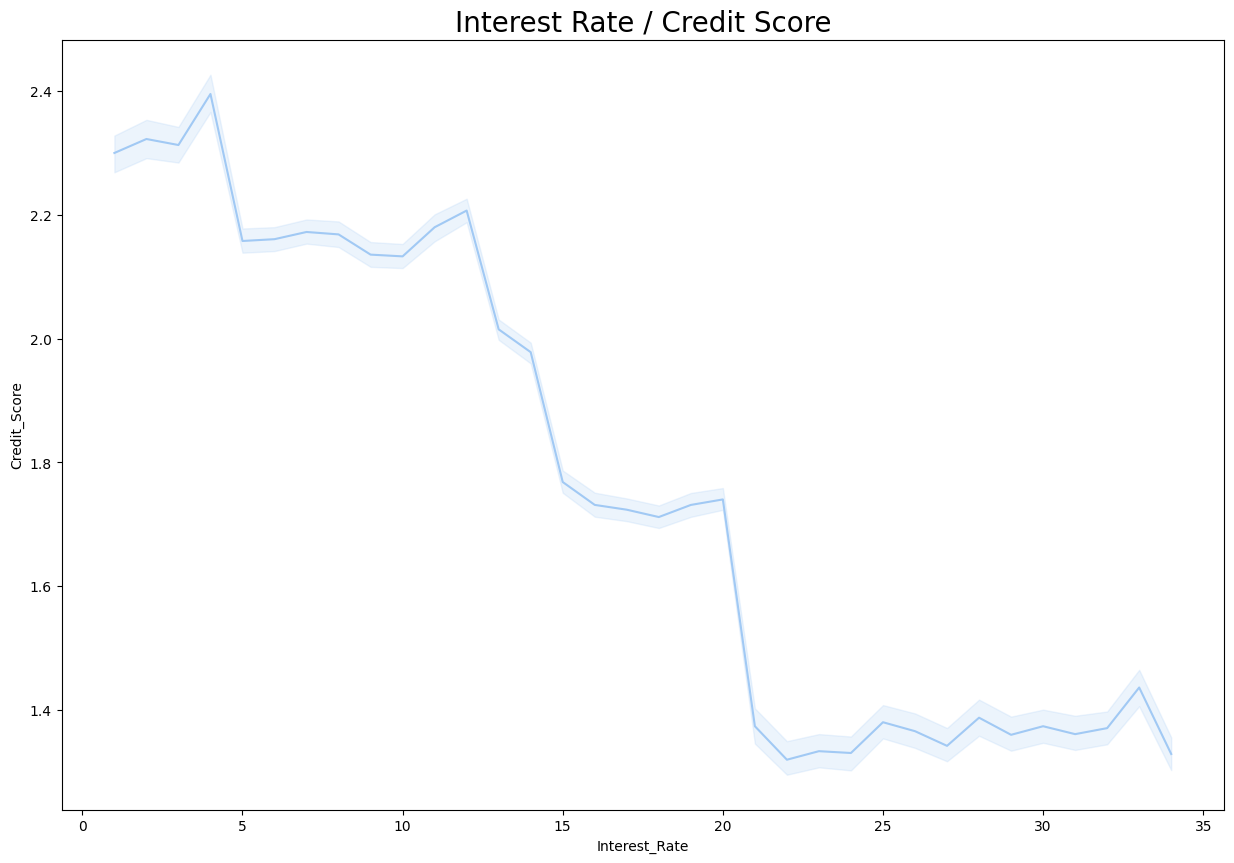

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Interest_Rate", y="Credit_Score", data=data)
plt.title("Interest Rate / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. When the interest rate is 8~9 and 20~21, the credit score decreases significantly.
    2. As Interest Rate increases, the credit score decreases.

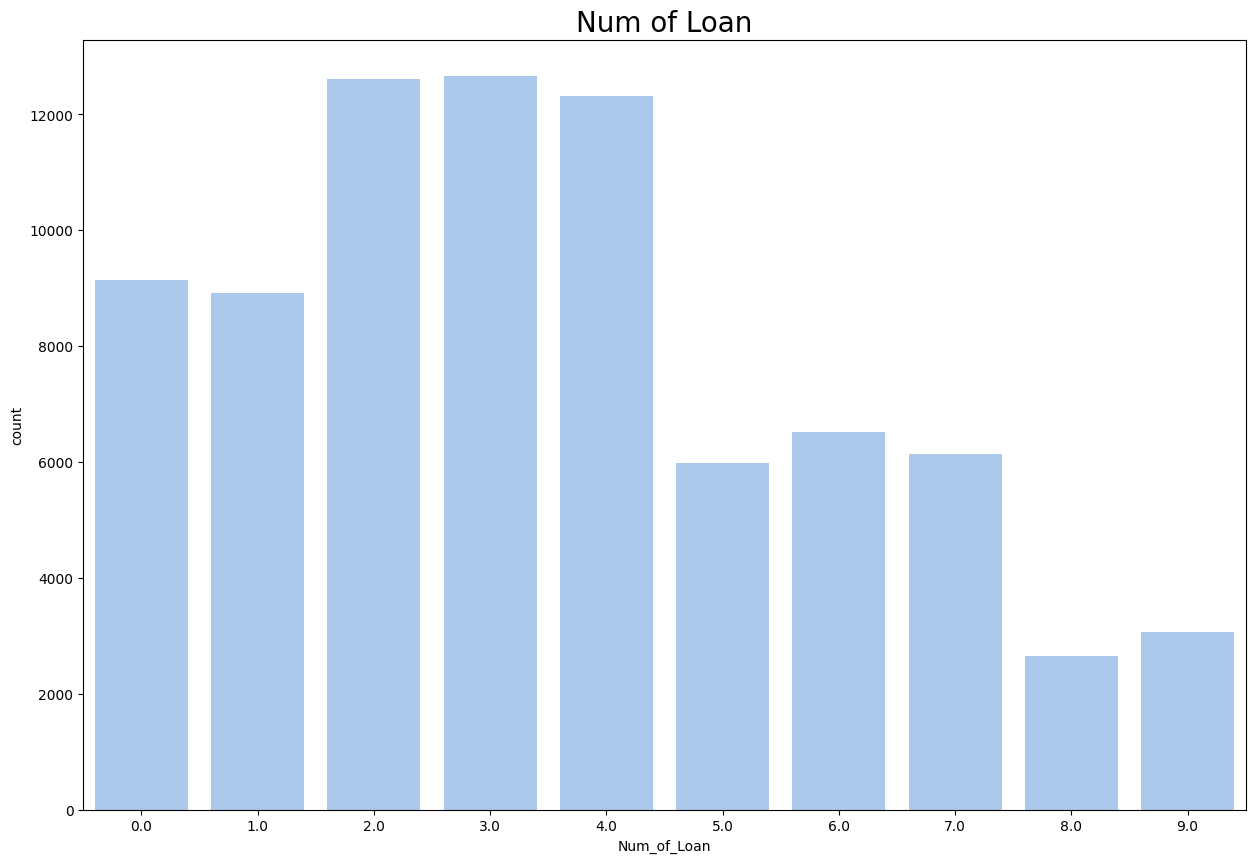

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x="Num_of_Loan", data=data)
plt.title("Num of Loan", fontsize=20)
plt.show()

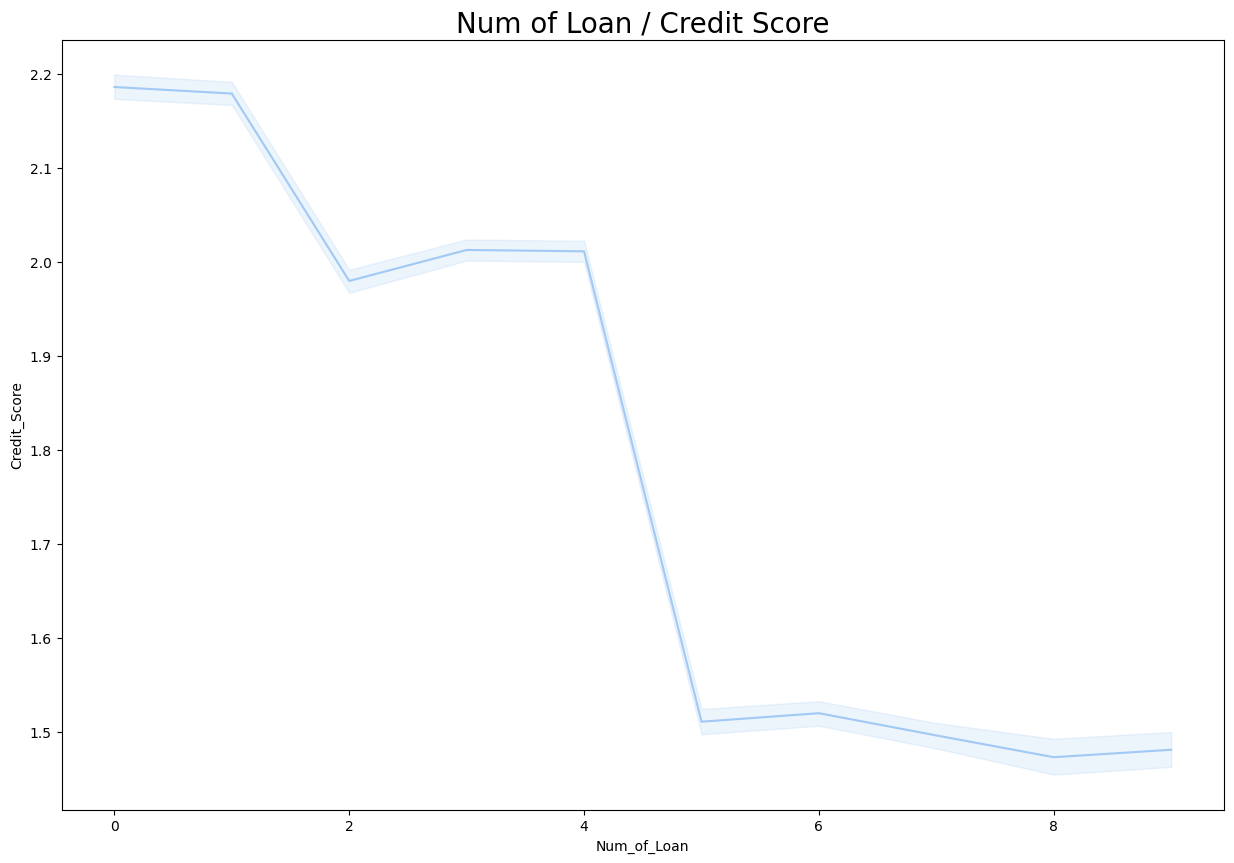

In [22]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Num_of_Loan", y="Credit_Score", data=data)
plt.title("Num of Loan / Credit Score", fontsize=20)
plt.show()

## What we can know(above 2 graphs)
    1. As the number of loans increases, the credit score decreases.
    2. The number of people who took out loans is the highest in number 2, 3, and 4. And you can see that there are even people who received numbers 8 and 9.
    3. It can be seen that the credit score is falling sharply from the number of loans taken from 1 to 2, 4 to 5. In particular, a really significant decline can be seen in 4 to 5.

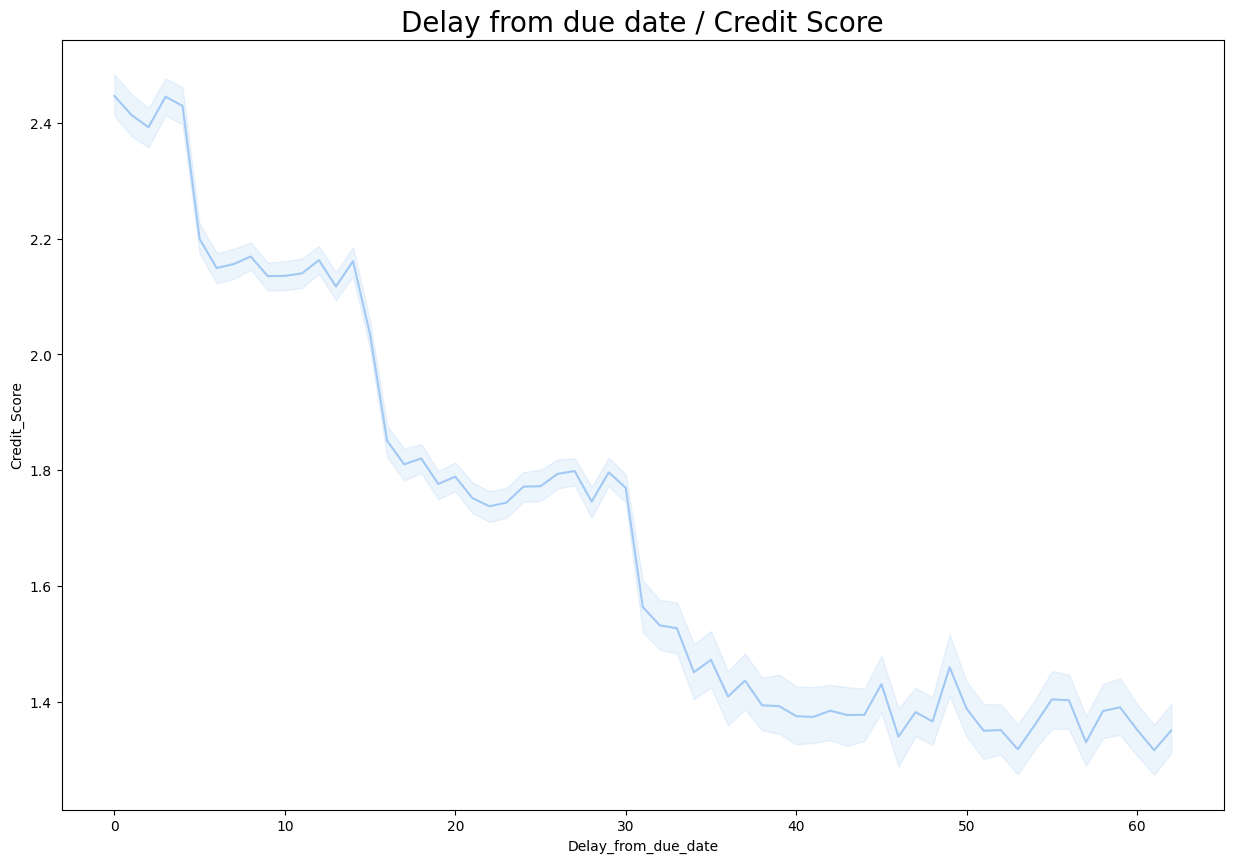

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Delay_from_due_date", y="Credit_Score", data=data)
plt.title("Delay from due date / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. As delay from due date increases, the credit score decreases.

C:\Users\vedan\AppData\Local\Temp\ipykernel_22084\2090221115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Num_of_Delayed_Payment"])


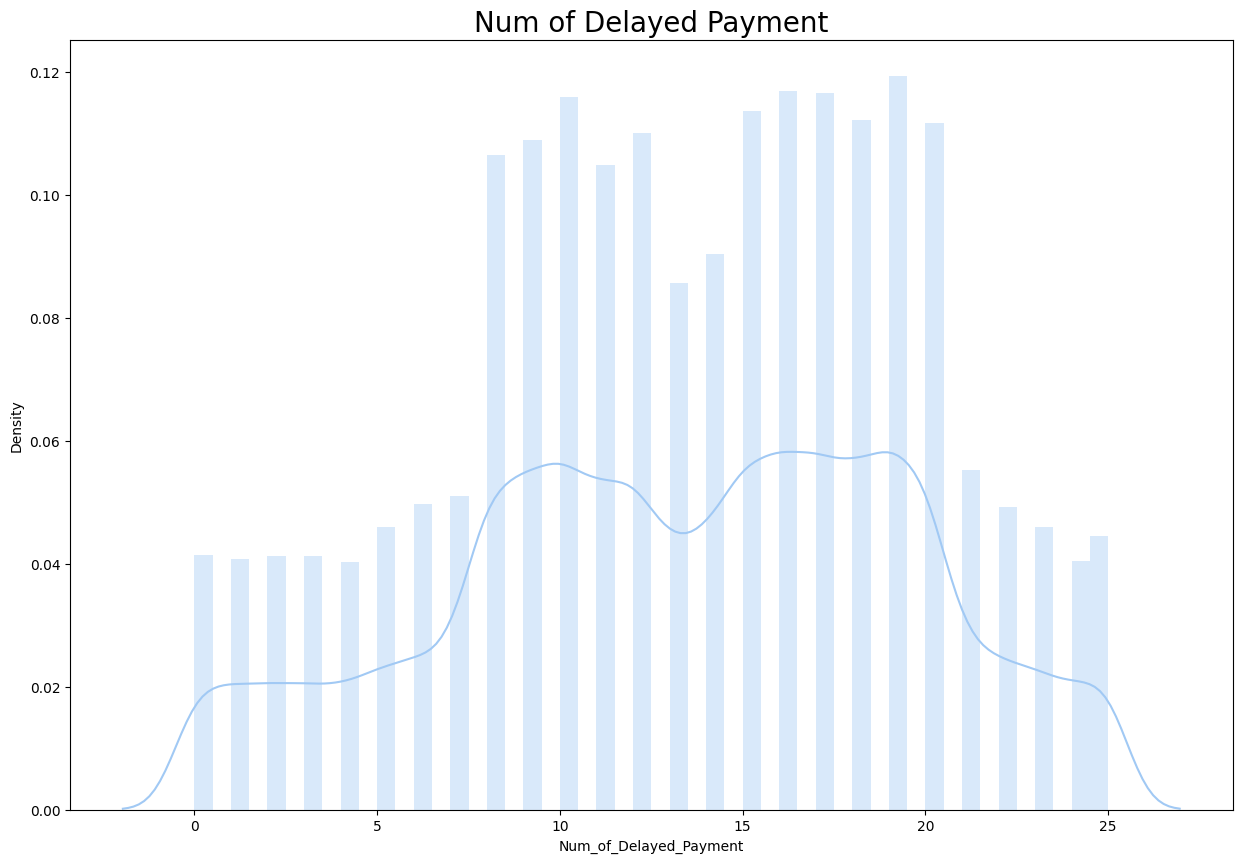

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(data["Num_of_Delayed_Payment"])
plt.title("Num of Delayed Payment", fontsize=20)
plt.show()

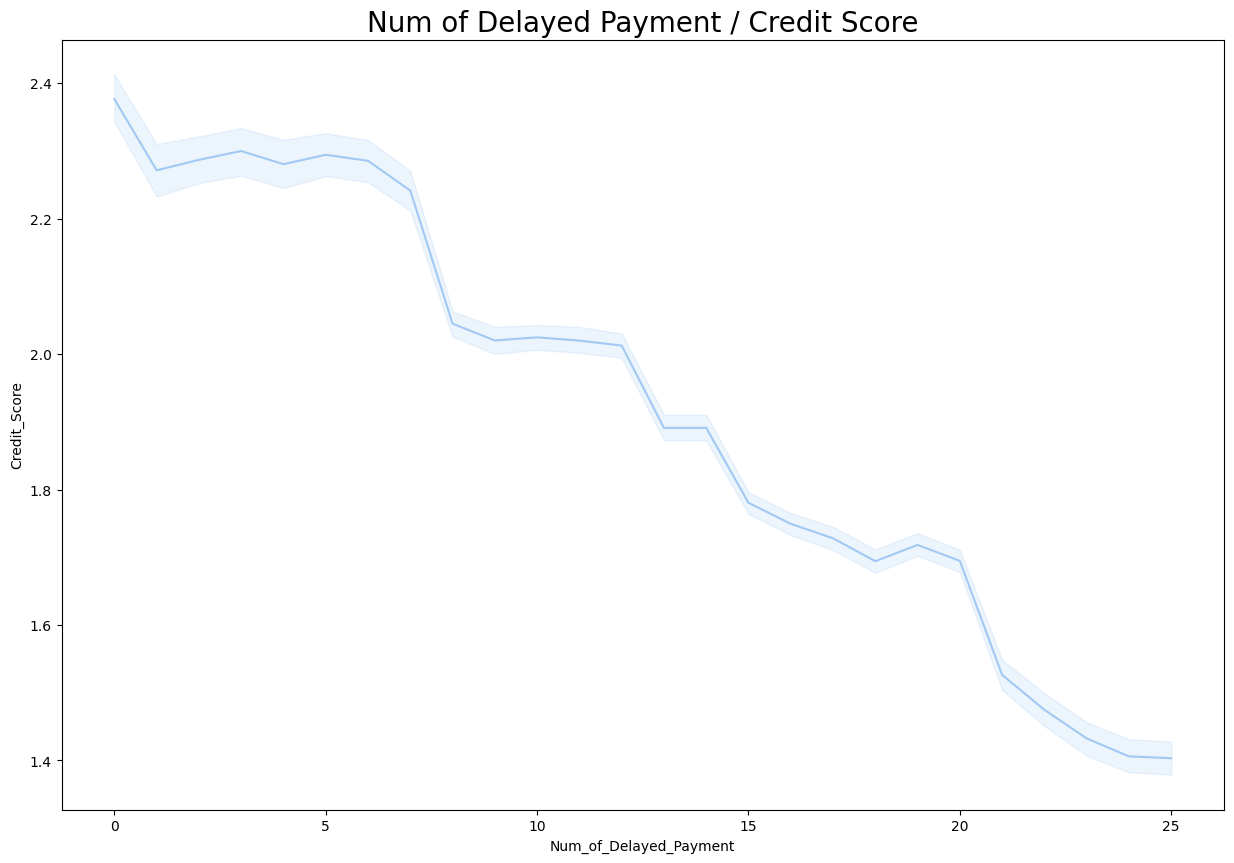

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Num_of_Delayed_Payment", y="Credit_Score", data=data)
plt.title("Num of Delayed Payment / Credit Score", fontsize=20)
plt.show()

## What we can know(above 3 graphs)
    1. Most people have yet to pay 8 to 20 kinds of money.
    2. The higher the number of overdue payments, the lower the credit score, which is almost straight.

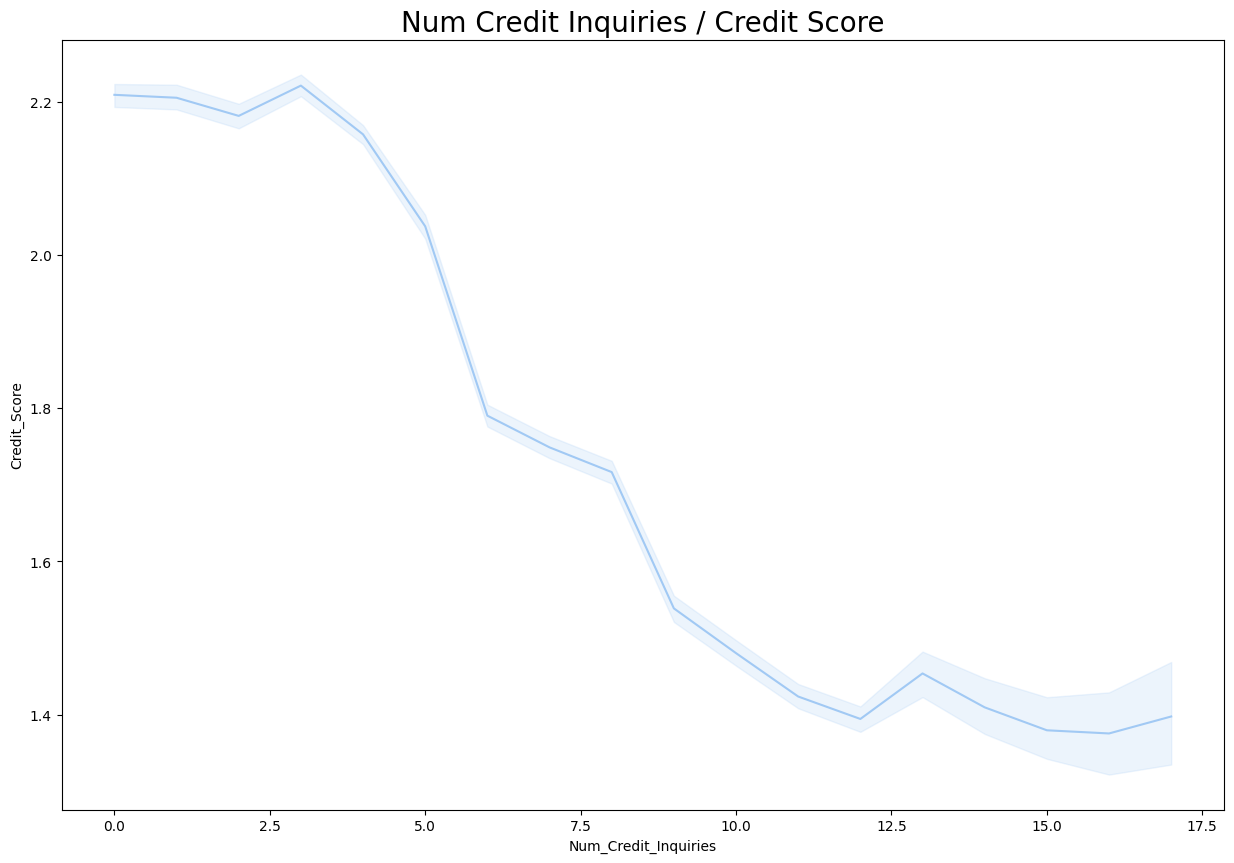

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Num_Credit_Inquiries", y="Credit_Score", data=data)
plt.title("Num Credit Inquiries / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. The more Num Credit Inquires increase, the lower the credit score.
    2. Num Credit Inquires shows a sharp drop in credit scores between 2 and 12.

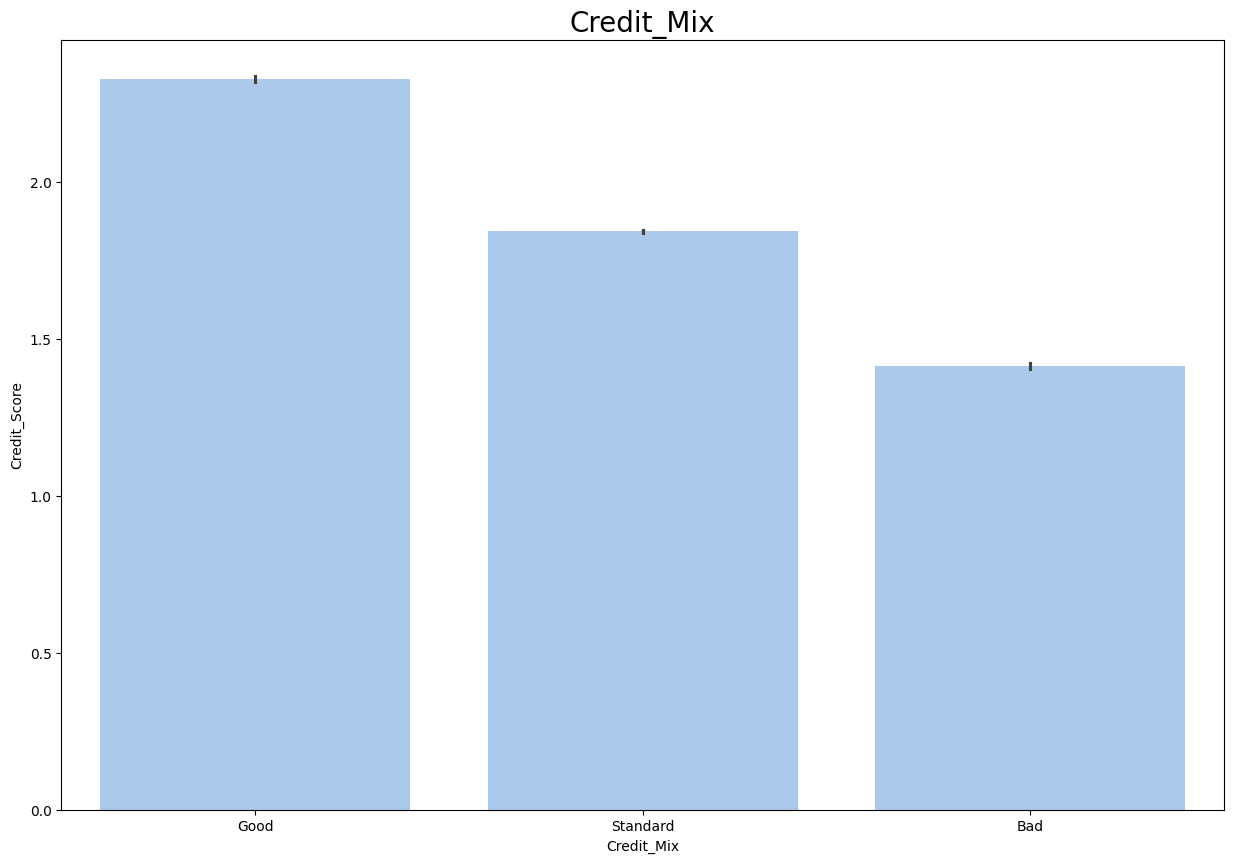

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x="Credit_Mix", y="Credit_Score", data=data)
plt.title("Credit_Mix", fontsize=20)
plt.show()

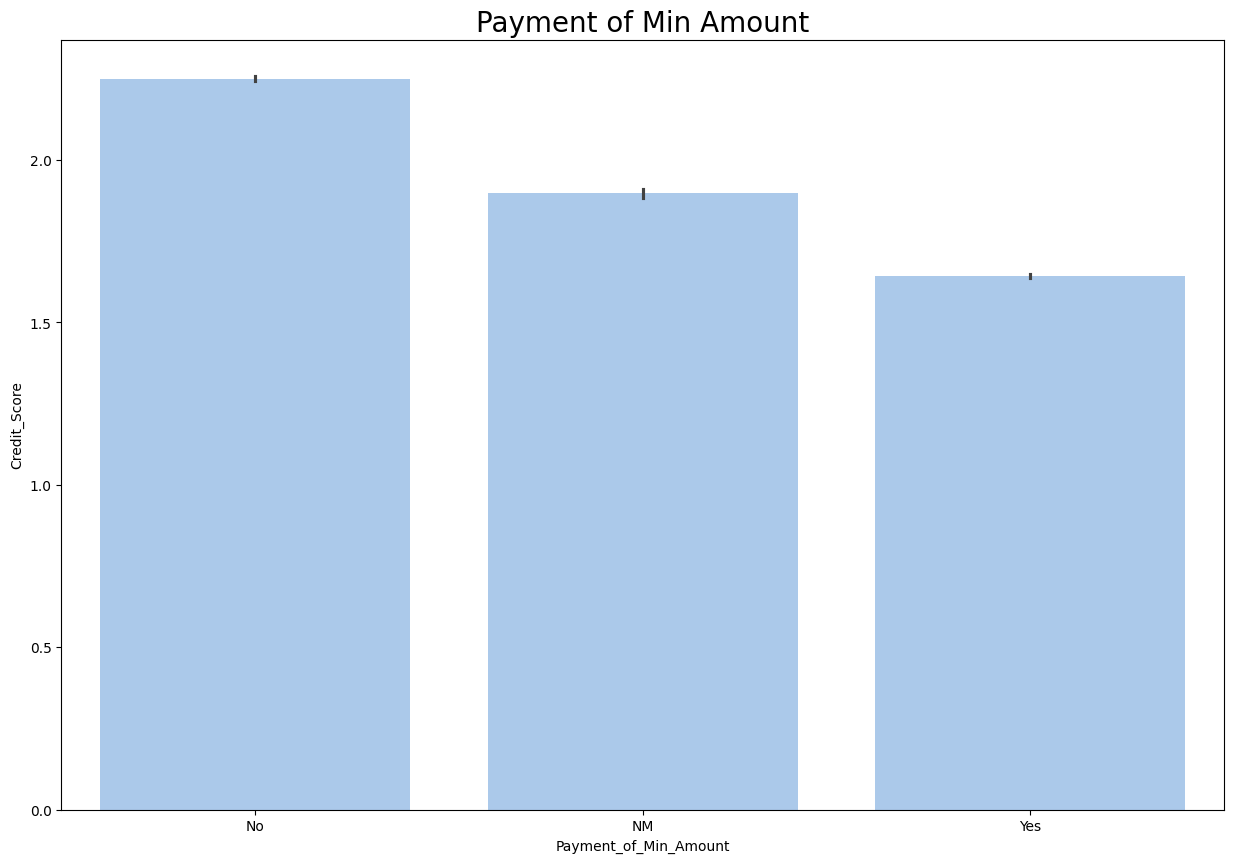

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x="Payment_of_Min_Amount", y="Credit_Score", data=data)
plt.title("Payment of Min Amount", fontsize=20)
plt.show()

## What we can know
    1. Credit Mix, Payment of Min Amount, has a direct relationship with the credit score.

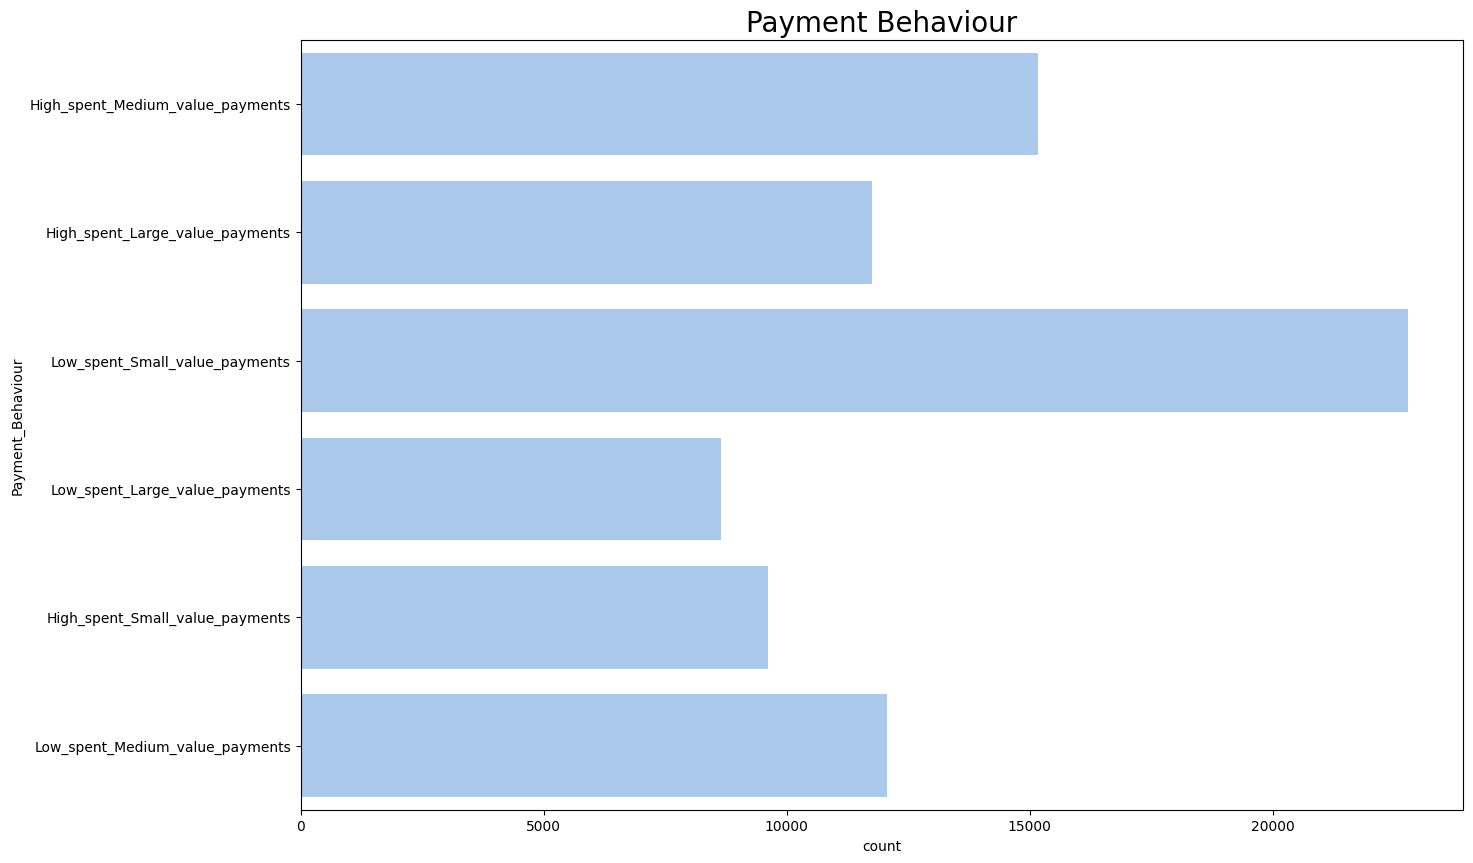

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(y="Payment_Behaviour", data=data)
plt.title("Payment Behaviour", fontsize=20)
plt.show()

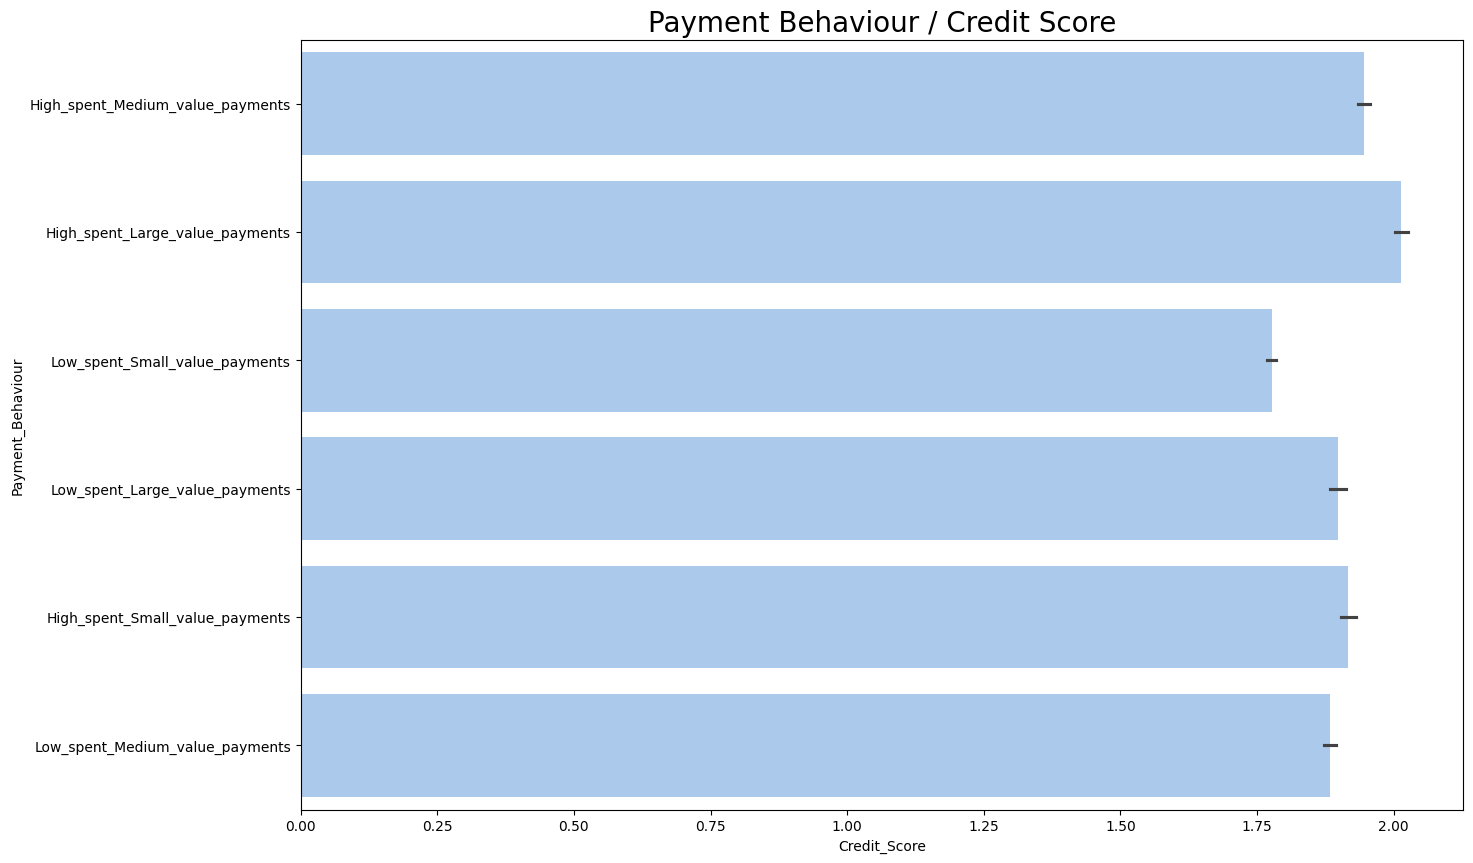

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x="Credit_Score", y="Payment_Behaviour", data=data)
plt.title("Payment Behaviour / Credit Score", fontsize=20)
plt.show()

## What we can know(above 2 graphs)
    1. The number of people in the Low_spent_Medium_value_payments group is the highest. But their credit scores are the lowest.
    2. People in the High_spent_Large_value_payments group have the best credit scores.

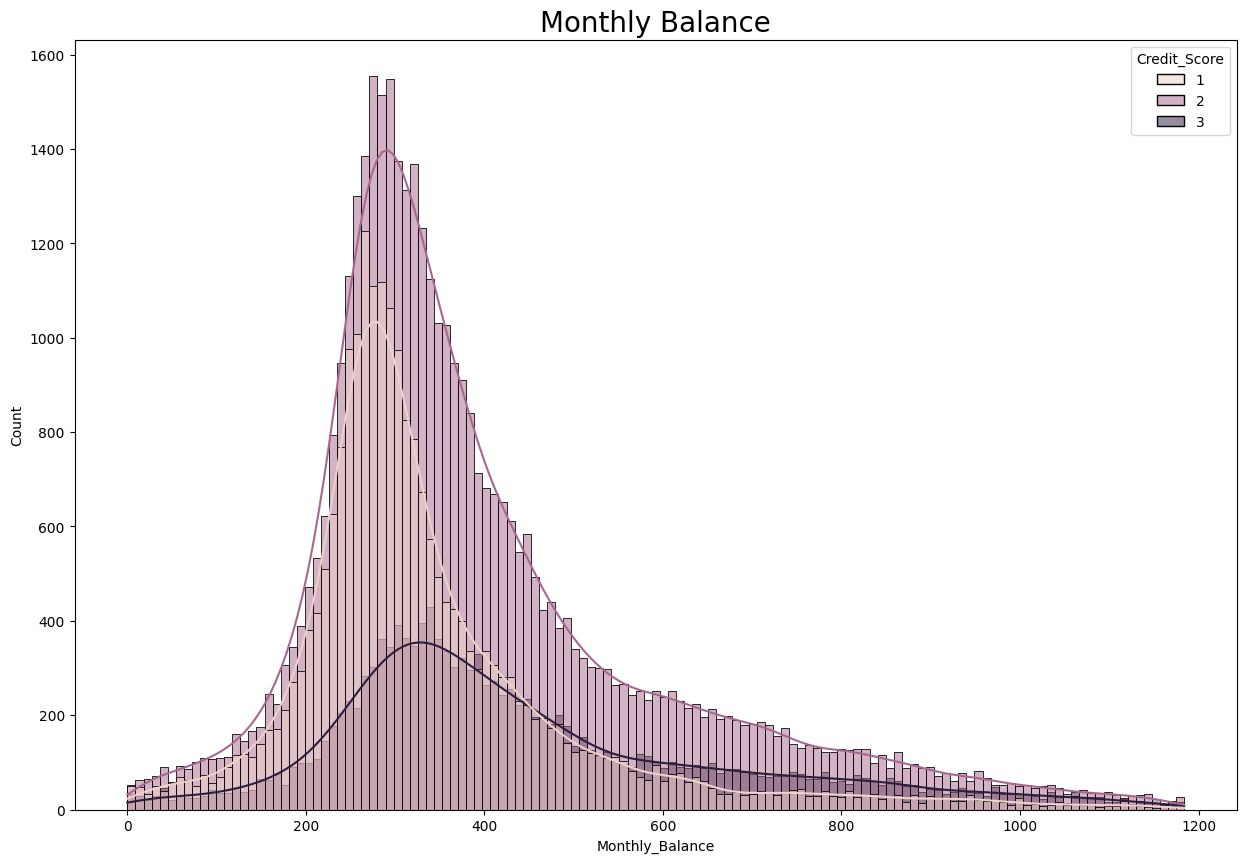

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x="Monthly_Balance", kde = True, hue="Credit_Score")
plt.title("Monthly Balance", fontsize=20)
plt.show()

## What we can know
    1. It can be seen that the monthly balance value of the largest number of people by credit score group is higher as the credit score is better.

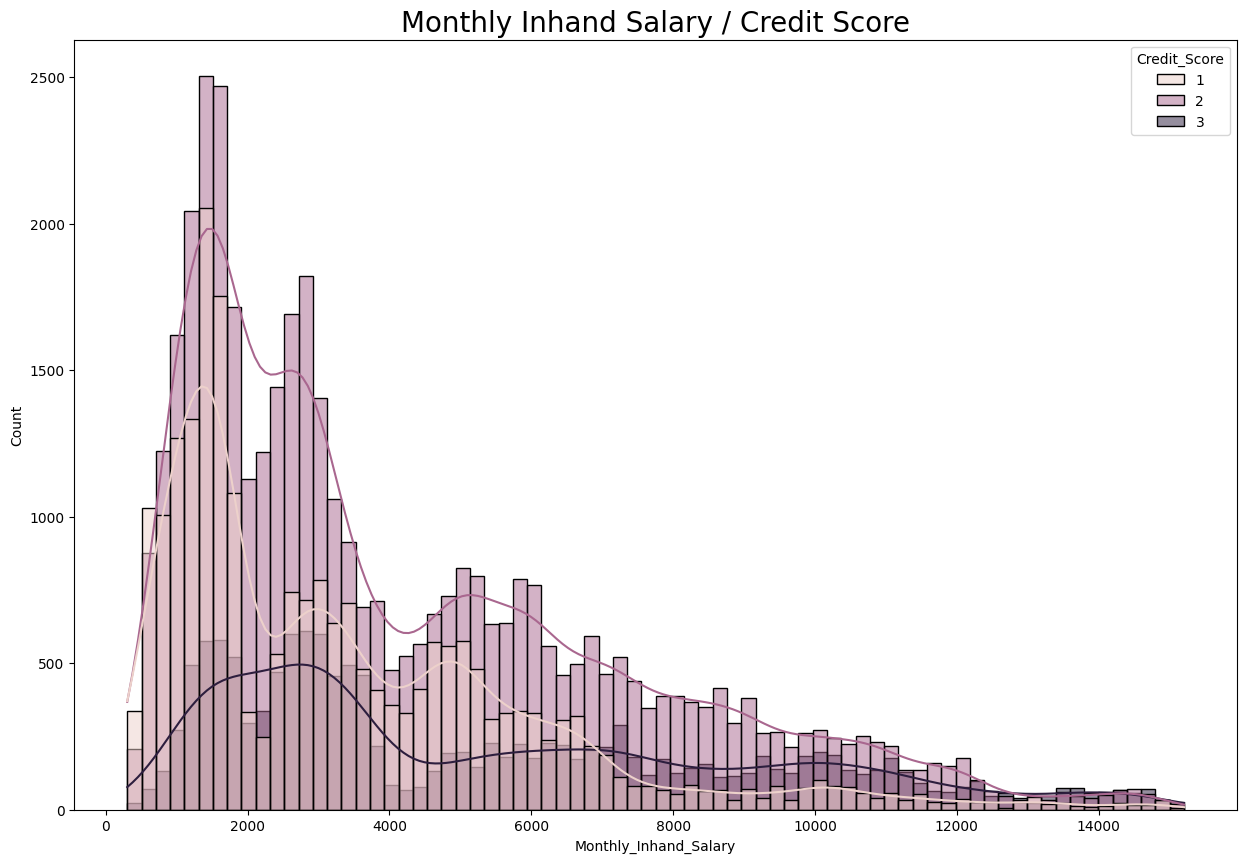

In [32]:
plt.figure(figsize=(15,10))
sns.histplot(x="Monthly_Inhand_Salary", hue="Credit_Score", kde= True, data=data)
plt.title("Monthly Inhand Salary / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. People with good credit scores have a higher distribution of Monthly Inhand Salaries than people with Standard or Poor.

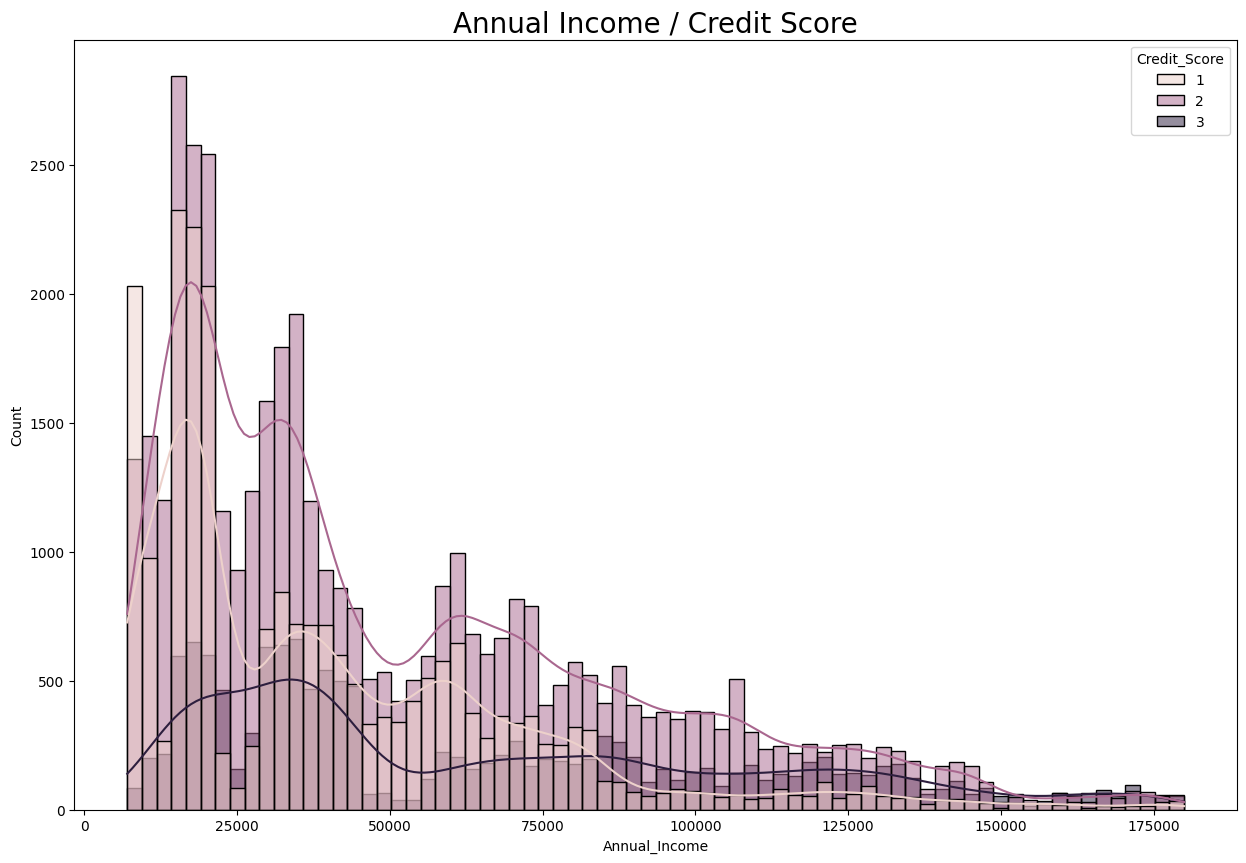

In [33]:
plt.figure(figsize=(15,10))
sns.histplot(x="Annual_Income", hue="Credit_Score", kde= True, data=data)
plt.title("Annual Income / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. People with good credit scores have a higher distribution of Annual Income than people with Standard or Poor.
    2. If you look at the graph of Annual Income rather than the graph of Monthly Inhand Salary, you can see the difference between the three groups more clearly.

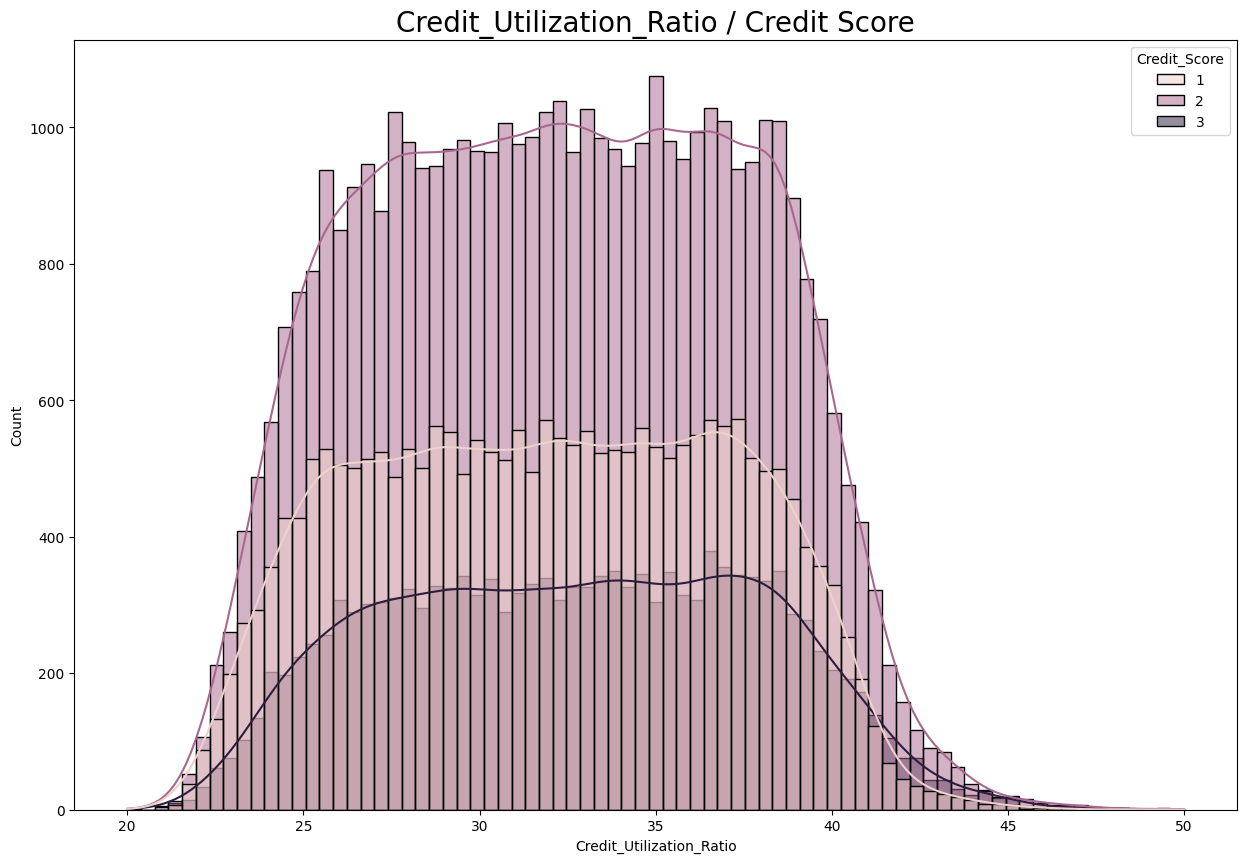

In [34]:
plt.figure(figsize=(15,10))
sns.histplot(x="Credit_Utilization_Ratio", hue="Credit_Score", kde= True, data=data)
plt.title("Credit_Utilization_Ratio / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. There is only a difference in the number of people, but there is no big difference between the three groups.

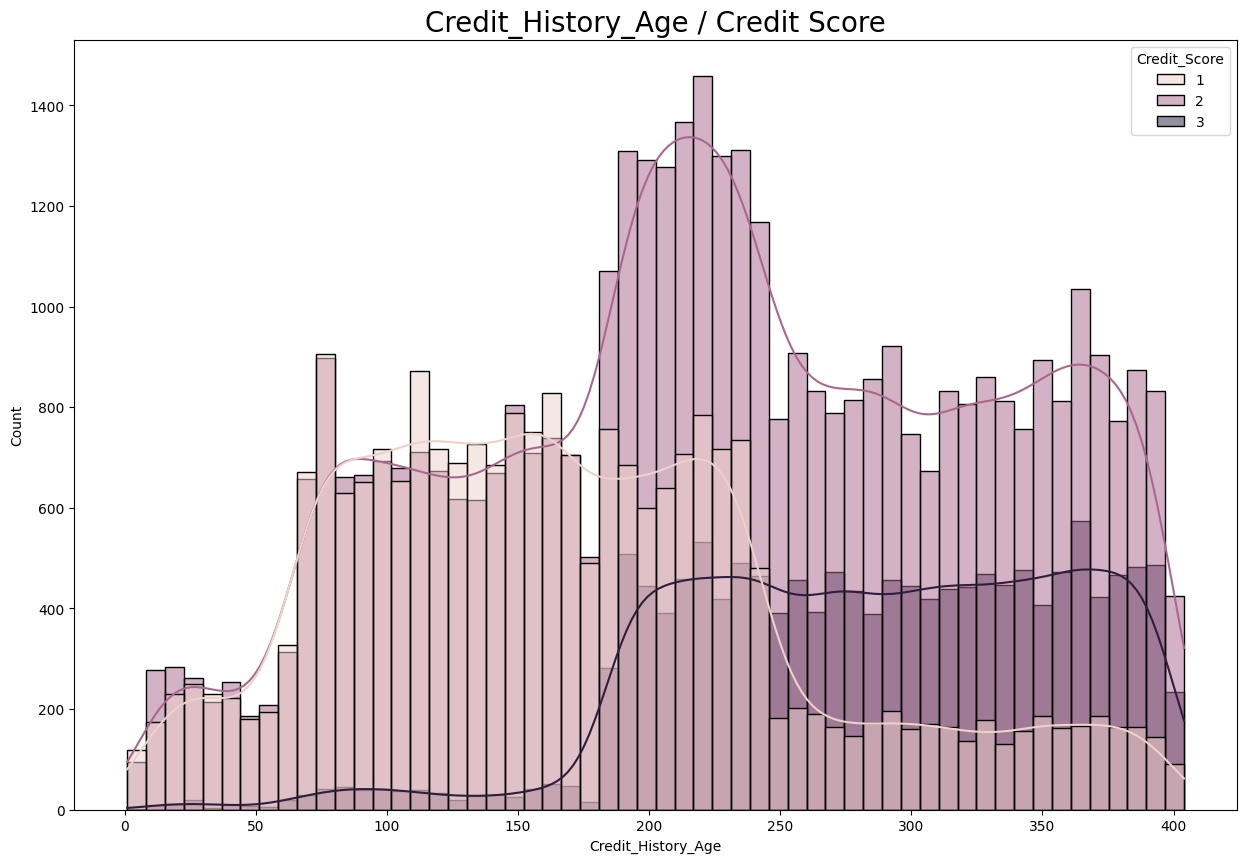

In [35]:
plt.figure(figsize=(15,10))
sns.histplot(x="Credit_History_Age", hue="Credit_Score", kde= True, data=data)
plt.title("Credit_History_Age / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. People belonging to Poor are widely distributed on the side with low Credit History Age values.
    2. Those who belong to Standard have a higher Credit History Age value than those who belong to Poor. Most of the people who belong to Good are widely distributed at high prices.

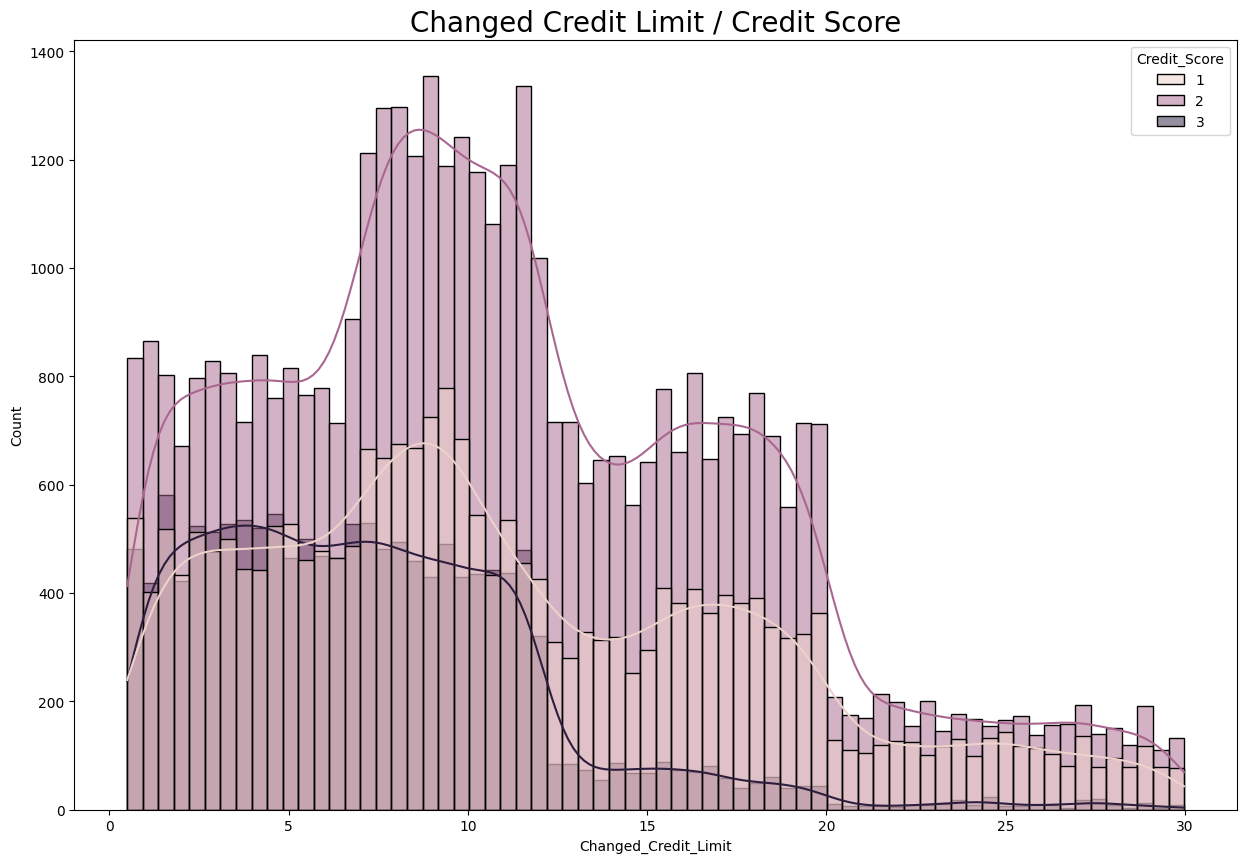

In [36]:
plt.figure(figsize=(15,10))
sns.histplot(x="Changed_Credit_Limit", hue="Credit_Score", kde= True, data=data)
plt.title("Changed Credit Limit / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. Those with a Good Credit Score changed their Credit Limit less than those with Standard or Poor.

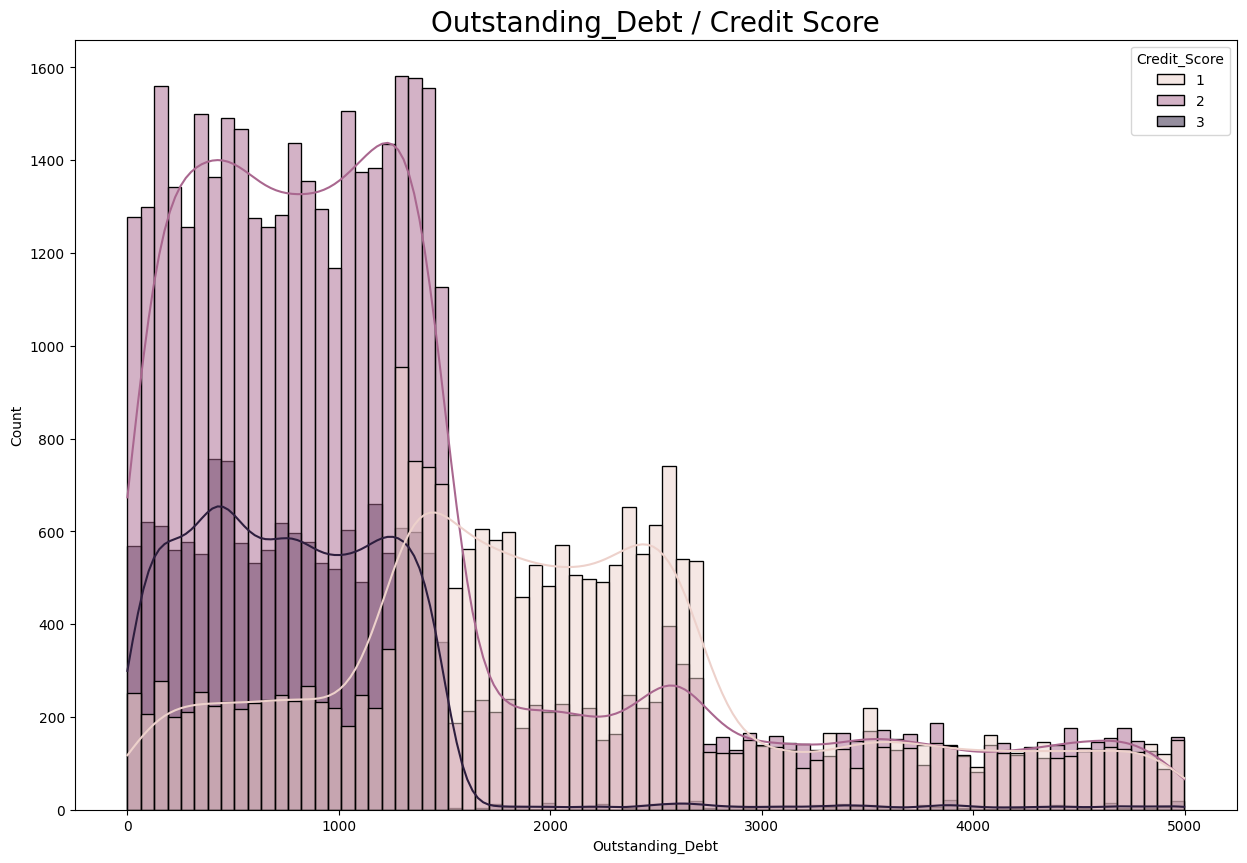

In [37]:
plt.figure(figsize=(15,10))
sns.histplot(x="Outstanding_Debt", hue="Credit_Score", kde= True, data=data)
plt.title("Outstanding_Debt / Credit Score", fontsize=20)
plt.show()

## What we can know
    1. People with Credit Score as Poor are more distributed where Outstanding Debt values are higher than those who belong to Standard or Poor. 
    2. Most people with a Good Credit Score do not have more than 1500 Outstanding Debts.

<a id="modeling"></a>
# 4.Modeling(LightGBM)🤖

In [38]:
import lightgbm as lgb
model_pre = lgb.LGBMClassifier()

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
params = {
    "n_estimators": [100, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "lambda_l1": [0, 10, 20, 30, 50],
    "lambda_l2": [0, 10, 20, 30, 50],
    "max_depth": [5, 10, 15, 20],
    "subsample": [0.6, 0.8, 1]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomizedSearchCV(model_pre, param_distributions=params, n_jobs=-1, n_iter=30)

In [ ]:
data.info()

In [ ]:
data = pd.get_dummies(data, columns=["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first=True)

In [ ]:
data.info()

In [ ]:
x = data.drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Credit_Score"], axis=1)
y = data["Credit_Score"]

In [ ]:
model.fit(x, y)

In [ ]:
model.best_params_

<a id="what"></a>
# 5. What is important for my 💳credit score?🤔

In [ ]:
model.best_estimator_.feature_importances_

In [ ]:
Fimp = pd.DataFrame({"feature": x.columns, "importance":model.best_estimator_.feature_importances_}).sort_values("importance", ascending=False)

plt.figure(figsize=(15,30))
sns.barplot(x="importance", y="feature", data=Fimp)
plt.title("What is importanct for my credit score?", fontsize=20)
plt.show()

## What we can know
    1. These are the most important features for model learning in the order of total monthly EMI, outstanding debt, and amount investment monthly.
    2. Most of the occpation values and Age Range values did not affect model learning.
    3. There are some things that we expected, but we can see that things that we didn't expect have a big impact on our credit score classification.

<a id="prediction"></a>
# 6. Prediction

In [ ]:
test = pd.read_csv("../input/creditscoreclassification/test.csv")

In [ ]:
test.info()

In [ ]:
t_age_range = [i // 10 for i in test["Age"]]
test["Age_Range"] = t_age_range
test["Age_Range"].value_counts()

In [ ]:
test = pd.get_dummies(test, columns=["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first=True)

In [ ]:
test.shape

In [ ]:
x_test = test.drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan"], axis=1)

In [ ]:
x.shape, x_test.shape

In [ ]:
pred = model.predict(x_test)

In [ ]:
test["Pred_Credit_Score"] = pred

In [ ]:
l_dict = {"1":"Poor", "2":"Standard", "3":"Good"}

for key, value in l_dict.items():
    test["Pred_Credit_Score"] = test["Pred_Credit_Score"].astype("str").str.replace(key, value)

In [ ]:
test["Pred_Credit_Score"].unique()

<a id="can"></a>
# 7. 💳Can I borrow money from the banks?💵

## The number of Prediction of Credit Score

In [ ]:
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
sns.countplot(x="Pred_Credit_Score", data=test)
plt.title("Can I borrow money from the banks?", fontsize=20)
plt.show()

In [ ]:
print("Number of people who can't borrow money from bank : ", len(test[test["Pred_Credit_Score"] == "Poor"]))
print("Number of people who can borrow money from bank : ", len(test[test["Pred_Credit_Score"] != "Poor"]))
print("Number of people who can borrow a lot of money from bank : ", len(test[test["Pred_Credit_Score"] == "Good"]))

## What we can know🤔
    1. 12718 people can't borrow money from bank. ❌
    2. 37282 people can borrow money from bank regardless of amount of money. ✅
    3. 9727 people's credit score is good. So they can borrow money from bank easy and a lot. 😎

## Can I borrow money from the banks? by Age Range

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=test, x ="Age_Range", hue="Pred_Credit_Score")
plt.title("Can I borrow money from the banks? by Age Range", fontsize=20)
plt.show()

## Can I borrow money from the banks? by Number of Credit Card

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=test, x ="Num_Credit_Card", hue="Pred_Credit_Score")
plt.title("Can I borrow money from the banks? by Number of Credit Card", fontsize=20)
plt.show()

In [ ]:
good_credit = test[test["Pred_Credit_Score"] == "Good"]
standard_credit = test[test["Pred_Credit_Score"] == "Standard"]
bad_credit = test[test["Pred_Credit_Score"] == "Poor"]

In [ ]:
re_test = pd.read_csv("../input/creditscoreclassification/test.csv")

In [ ]:
re_test["Pred_Credit_Score"] = test["Pred_Credit_Score"]

In [ ]:
goodjob = pd.DataFrame({"job": re_test[re_test["Pred_Credit_Score"] == "Good"]["Occupation"], "Credit_Score": good_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=re_test, y="Occupation", hue="Pred_Credit_Score")
plt.title("Occupations by Prediction", fontsize=20)
plt.show()

## Good Credit Score Occupation

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=goodjob, y="job")
plt.title("Occupations of Good", fontsize=20)
plt.show()

## What we can know
    1. It can be seen that among those with Good credit scores, architect and scientists are the most and writers are the least.

## Standard Credit Score Occupation

In [ ]:
standardjob = pd.DataFrame({"job": re_test[re_test["Pred_Credit_Score"] == "Standard"]["Occupation"], "Credit_Score": standard_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=standardjob, y="job")
plt.title("Occupations of Standard", fontsize=20)
plt.show()

## What we can know
    1. Among those with Standard credit scores, lawyers are the most common, and entrepreneurs and musicians are the least.

## Poor Credit Score Occupation

In [ ]:
poorjob = pd.DataFrame({"job": re_test[re_test["Pred_Credit_Score"] == "Poor"]["Occupation"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=poorjob, y="job")
plt.title("Occupations of Poor", fontsize=20)
plt.show()

## What we can know
    1. Among those with a Poor credit score, entrepreneurs and engineers are the most common, and musicians are the least.

In [ ]:
goodbehav = pd.DataFrame({"behavior": re_test[re_test["Pred_Credit_Score"] == "Good"]["Payment_Behaviour"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=re_test, y="Payment_Behaviour", hue="Pred_Credit_Score")
plt.title("Payment_Behaviour by Prediction", fontsize=20)
plt.show()

## Good Credit Score Payment Behavior

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=goodbehav, y="behavior")
plt.title("Payment Behavior of Good", fontsize=20)
plt.show()

## What we can know
    1. Among those with a good credit score, Payment Behavior has the largest number of people who have High_spent_Medium_value_payments and the smallest number of people who have Low_spent_Large_value_payments.

## Standard Credit Score Payment Behavior

In [ ]:
standardbehav = pd.DataFrame({"behavior": re_test[re_test["Pred_Credit_Score"] == "Standard"]["Payment_Behaviour"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=standardbehav, y="behavior")
plt.title("Payment Behavior of Standard", fontsize=20)
plt.show()

## What we can know
    1. Among those with a standard credit score, Payment Behavior has the largest number of people in Low_spent_Small_value_payments, while Low_spent_Large_value_payments has the least number of people in Low_spent_Large_value_payments.

## Poor Credit Score Payment Behavior

In [ ]:
poorbehav = pd.DataFrame({"behavior": re_test[re_test["Pred_Credit_Score"] == "Poor"]["Payment_Behaviour"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=poorbehav, y="behavior")
plt.title("Payment Behavior of Poor", fontsize=20)
plt.show()

## What we can know
    1. Among those with a Poor credit score, it can be seen that Payment Behavior has the largest number of people in Low_spent_Small_value_payments, while the smallest number of people in High_spent_Large_value_payments. It can be seen that the number of low_spent_Small_value_payments is overwhelmingly large.

## Number of Payment of Min Amount by Prediction

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=re_test, y="Payment_of_Min_Amount", hue="Pred_Credit_Score")
plt.title("Payment of Min Amount by Prediction", fontsize=20)
plt.show()

## What we can know🤔
    1. The number of Payment of Min Amounts is in the order of Yes, No, and NM.

## Good Credit Score Payment of Min Amount

In [ ]:
goodmin = pd.DataFrame({"min": re_test[re_test["Pred_Credit_Score"] == "Good"]["Payment_of_Min_Amount"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=goodmin, y="min")
plt.title("Payment of Min Amount of Good", fontsize=20)
plt.show()

## What we can know🤔
    1. The order of Payment of Min Amount for those with a Good Credit Score is No, NM, and Yes.
    2. In fact, most people with a good Credit Score have a No Payment of Min Amount.

## Standard Score Payment of Min Amount

In [ ]:
standardmin = pd.DataFrame({"min": re_test[re_test["Pred_Credit_Score"] == "Standard"]["Payment_of_Min_Amount"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=standardmin, y="min")
plt.title("Payment of Min Amount of Standard", fontsize=20)
plt.show()

## What we can know🤔
    1. The order of Payment of Min Amount for those with a Credit Score of Standard is Yes, NO, and NM.
    2. For those with a Good Credit Score, Yes, which was the lowest, was the highest in this case.

## Poor Credit Score Payment of Min Amount

In [ ]:
poormin = pd.DataFrame({"min": re_test[re_test["Pred_Credit_Score"] == "Poor"]["Payment_of_Min_Amount"], "Credit_Score": bad_credit["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=poormin, y="min")
plt.title("Payment of Min Amount of Poor", fontsize=20)
plt.show()

## What we can know🤔
    1. The order of Payment of Min Amount for people with Credit Score is Yes, NM, and No.
    2. In fact, most people with a good Credit Score have Yes Payment of Min Amount.

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=re_test, x="Total_EMI_per_month", kde = True, hue="Pred_Credit_Score")
plt.title("Total EMI per month", fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=re_test, x="Total_EMI_per_month", kde = True, hue="Pred_Credit_Score")
plt.xlim(0,500)
plt.title("Total EMI per month", fontsize=20)
plt.show()

## What we can know🤔(above 2 graphs):
    1. Most people's total EMI per month is less than 500.
    2. There are many people who belong to Standard and Good who have values close to zero.

## Outstanding Debt

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=re_test, x="Outstanding_Debt", kde = True, hue="Pred_Credit_Score")
plt.title("Outstanding Debt", fontsize=20)
plt.show()

## What we can know🤔
    1. Most of the people who belong to Standard and Good have an Outstanding Debt value of 1500 or less.
    2. Most of the people in the Poor have Outstanding Debt values ranging from 1400 to 2600.
    3. If you look at people who belong to Standard, the Outstanding Debt value increases again from 2400, so you can see a flat graph.

In [ ]:
salary = pd.DataFrame({"salary": re_test["Monthly_Inhand_Salary"], "Credit_Score": re_test["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=salary, x="salary", kde=True, hue="Credit_Score")
plt.title("Monthly Inhand Salary of Prediction", fontsize=20)
plt.show()

## What we can know🤔
    1. It is remarkably high when comparing the values of those with Good Credit Score with those with Poor and Standard.
    2. Unlike the price of people whose Credit Score is Standard and Good, those who belong to Poor are distributed in a low Salary.

In [ ]:
income = pd.DataFrame({"income": re_test["Annual_Income"], "Credit_Score": re_test["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=income, x="income", kde=True, hue="Credit_Score")
plt.title("Annual Income of Prediction", fontsize=20)
plt.show()

## What we can know🤔
    1. People with a good Credit Score are evenly distributed in areas where they receive high income.

In [ ]:
history = pd.DataFrame({"history": re_test["Credit_History_Age"], "Credit_Score": re_test["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=history, x="history", kde=True, hue="Credit_Score")
plt.title("Credit History Age of Prediction", fontsize=20)
plt.show()

## What we can know🤔
    1. The higher the Credit Score, the higher the Credit History Age value is distributed.

In [ ]:
limit = pd.DataFrame({"limit": re_test["Changed_Credit_Limit"], "Credit_Score": re_test["Pred_Credit_Score"]})

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=limit, x="limit", kde=True, hue="Credit_Score")
plt.title("Changed Credit Limit of Prediction", fontsize=20)
plt.show()

## What we can know🤔
    1. People with a good Credit Score didn't change their Credit Limit much.
    2. In contrast, those who are Poor or Standard are evenly distributed with many changes.

<a id="conclusion"></a>
# 8. Money💵: Summary✍️
    

### 1. 12718 people can't borrow money from bank. ❌

### 2. 37282 people can borrow money from bank regardless of amount of money. ✅

### 3. 9727 people's credit score is good. So they can borrow money from bank easy and a lot. 😎

### 4. Like train data most people are in standard credit score. 

### 5. If the number of credit cards exceeds seven, no one has a good credit score. 

### 6. It can be seen that among those with Good credit scores, architect and scientists are the most and writers are the least.

### 7. Among those with Standard credit scores, lawyers are the most common, and entrepreneurs and musicians are the least.

### 8. Among those with a Poor credit score, entrepreneurs and engineers are the most common, and musicians are the least.

### 9. Among those with a good credit score, Payment Behavior has the largest number of people who have High_spent_Medium_value_payments and the smallest number of people who have Low_spent_Large_value_payments.

### 10. Among those with a standard credit score, Payment Behavior has the largest number of people in Low_spent_Small_value_payments, while Low_spent_Large_value_payments has the least number of people in Low_spent_Large_value_payments.

### 11. Among those with a Poor credit score, it can be seen that Payment Behavior has the largest number of people in Low_spent_Small_value_payments, while the smallest number of people in High_spent_Large_value_payments. It can be seen that the number of low_spent_Small_value_payments is overwhelmingly large.

### 12. The number of Payment of Min Amounts is in the order of Yes, No, and NM.

### 13. The order of Payment of Min Amount for those with a Good Credit Score is No, NM, and Yes.

### 14. In fact, most people with a good Credit Score have a No Payment of Min Amount.

### 15. The order of Payment of Min Amount for those with a Credit Score of Standard is Yes, NO, and NM.

### 16. For those with a Good Credit Score, Yes, which was the lowest, was the highest in this case.

### 17. Most people's total EMI per month is less than 500.

### 18. There are many people who belong to Standard and Good who have values close to zero.

### 19. Most of the people who belong to Standard and Good have an Outstanding Debt value of 1500 or less.

### 20. Most of the people in the Poor have Outstanding Debt values ranging from 1400 to 2600.

### 21. If you look at people who belong to Standard, the Outstanding Debt value increases again from 2400, so you can see a flat graph.

### 23. It is remarkably high when comparing the values of those with Good Credit Score with those with Poor and Standard.

### 24. Unlike the price of people whose Credit Score is Standard and Good, those who belong to Poor are distributed in a low Salary.

### 25. People with a good Credit Score are evenly distributed in areas where they receive high income.

### 26. The higher the Credit Score, the higher the Credit History Age value is distributed.

### 27. People with a good Credit Score didn't change their Credit Limit much.

### 28. In contrast, those who are Poor or Standard are evenly distributed with many changes.

# 👍Thank You👍

<center><h1> Thank you for reading my notebook. It was really fun when i was working with this data. I was surprised that unexpected values are important for prediction. Let's always be careful not to lower our credit scores!💳 I hope you liked this notebook👍👍👍 </h1></center>